# Проект по анализу убытков приложения ProcrastinatePRO+

**Цель исследования** - разобраться в причинах убытков приложения ProcrastinatePRO+, возникших на фоне огромных вложений в рекламу, и помочь компании выйти в плюс.

**Задачи исследования:**
- узнать откуда приходят пользователи и какими устройствами они пользуются,
- узнать сколько стоит привлечение пользователей из различных рекламных каналов;
- узнать сколько денег приносит каждый клиент,
- узнать когда расходы на привлечение клиента окупаются,
- узнать какие факторы мешают привлечению клиентов.

**Источник данных** - три датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Навыки и инструменты** - Python, Pandas, Matplotlib, когортный анализ, юнит-экономика, продуктовые метрики. 
____

# Резюме

**Причины убытков приложения ProcrastinatePRO+ в последние несколько месяцев:**

1. Изменение структуры каналов привлечения.
2. Низкий уровень удержания клиентов.
3. Отсутствие окупаемости рекламы в США при колоссальных рекламных затратат в этом регионе.
4. Пользователи, использующие Mac, iPhone и Android, не окупаются

**Рекомендации для приложения ProcrastinatePRO+:**
1. Изменить пропорции распределения рекламных расходов в США между каналами в пользу источников MediaTorado, YaRabbit и RocketSuperAds.
2. Часть рекламных расходов, ранее отдаваемых для канала TipTop, использовать для каналов европейского региона, в первую очередь для lambdaMediaAds и AdNonSense.
3. Изменить подход к удержанию пользователей.
4. Проверить работу прилодения на Android, Mac и iPhone на предмет технических ошибок.
5. Проверить адаптивность приложения под PC.
6. Рассмотреть возможность увеличения конверсии для источников YRabbit, MediaTornado, LeapBob и OppleCreativeMedia.

____

# Краткое содержание работы

**В 1-м разделе выполнялось изучение данных и их предобработка.**

Здесь было произведено знакомство с данными методами `info()`, `duplicated().sum()`. При обработке данных потребовалось изменить написание наименований столбцов методами `str.lower()` и `str.replace()` и выборочно изменить тип дат с помощью метода `to_datetime()`.

**Во 2-м разделе выполнялась подготовка технической составляющей исследования.**

Необходимо было создать или адаптировать готовые функции для расчета и визуализации таких метрик как конверсия, удержание, LTV, CAC, ROI, а также функцию сглаживания. В исследовании использовались адаптированные функции, изученные в теоретической части курса.

**В 3-м разделе проводился анализ пользователей.**

По созданному датафрейму с профилями пользователей (использовалась функция, изученная в теоретической части курса), анализировалось региональное распределение платящих пользователей и используемые ими устройства, а также были рассмотрены источники привлечения пользователей. 

**В 4-м разделе проводился анализ маркетинговых расходов**

В этой части исследования были детально изучены маркетинговые расходы приложения: уровень затрат по каналам привлечения и по месяцам, динамика изменения уровня затрат по источникам во времени, а также показатель стоимости привлечения одного клиента (САС).

**В разделах 5-8 проводился анализ окупаемоси рекламы:**
- в общем виде,
- в разрезе устройств пользователей,
- в разрезе стран пользователей,
- в разрезе рекламных каналов.

На каждом этапе рассчитывались конверсия, удержание, LTV и ROI.

## Загрузка файлов и знакомство с данными

### Импорт библиотек

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Загрузка файлов

In [3]:
# получим сведения о датасете visits и проверим его на дубликаты

visits.info()

display(visits.head(5))

visits.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

0

In [4]:
# получим сведения о датасете orders и проверим его на дубликаты

orders.info()

display(orders.head(5))

orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

0

In [5]:
# получим сведения о датасете costs и проверим его на дубликаты

costs.info()

display(costs.head(5))

costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

0

Выводы по загрузке данных:
1. <font color="browm">дубликатов не обнаружено</font>
2. в названиях столбцов есть пробелы и заглавные буквы, нужно привести всё к единому формату <font color="browm">исправлено</font>
3. во всех файлах формат дат типа object, необходимо привести их к формату даты после объединения таблиц <font color="browm">исправлено</font>

### Предобработка данных

Изменим наименование столбцов в `visits`:

In [6]:
visits.columns = visits.columns.str.lower()

visits.columns = visits.columns.str.replace(' ', '_')

visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Изменим наименование столбцов в `orders`:

In [7]:
orders.columns = orders.columns.str.lower()

orders.columns = orders.columns.str.replace(' ', '_')

orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Изменим наименование столбцов в `costs`:

In [8]:
costs.columns = costs.columns.str.lower()

costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [9]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверка изменений:

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


## Создание функции для расчета и анализа LTV, ROI, удержания и конверсии

Далее в проекте при расчете метрик будут использоваться такие параметры как момент анализа и горизонт анализа. По заданным условиям датой проведения анализа считается 01.11.2019, а горизонт анализа не задан, поэтому по общепринятой практике последний параметр будет задан равным 14 дням.

Для решения кейса использовались функции, приведенные в теоретической части курса.

### Присвоение значений постоянным параметрам

In [13]:
# зададим датау провеления анализа

observation_date = datetime(2019, 11, 1)

# зададим горизонт анализа

horizon_days = 14

### Функция для расчета удержания

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета конверсиии

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index())

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета LTV и ROI

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')

    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'}))

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time)  # таблица динамики ROI

### Функция для визуализации удержания

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации  LTV и ROI

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(17, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 5, sharey=ax1)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 6, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для сглаживания фрейма (шума на графиках)

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Анализ пользователей

### Построим профили пользователей

In [21]:
# используем функцию для создания пользовательских профилей, используя материалы из теоретической части курса

def get_profiles(sessions, orders, costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first',
              'channel': 'first',
              'device': 'first',
              'region': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [22]:
# получим профили пользователей

profiles = get_profiles(visits, orders, costs)

display(profiles.head(5))

# проверим формат дат

profiles.info()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [23]:
# определим минимальную и максимальную даты привлечения пользователей

min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

display('Самая ранняя дата привлечения пользователей {}'.format(min_analysis_date))
display('Самая поздняя дата привлечения пользователей {}'.format(max_analysis_date))

'Самая ранняя дата привлечения пользователей 2019-05-01'

'Самая поздняя дата привлечения пользователей 2019-10-27'

Даты совпадают с данными в условиях задачи о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, значит, профили построены корректно.

### Проанализируем региональное распределение пользователей

Определим страны, из которых приходят платящие пользователи, общее количество пользователей в разрезе стран 
и долю покупателей в каждой стране:

In [24]:
(profiles.groupby('region')
        .agg({'payer': ['count', 'mean']})   
        .droplevel(0, axis=1)
        .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
        .reset_index(level=0)
        .sort_values(by='payer_share',ascending = False)
        .reset_index(drop=True)
        .style.format({'payer_share': '{:,.2%}'}))

Проверим количество клиентов в разрезе платящих и не платящих пользователей:

In [25]:
region_payer = (profiles
                .pivot_table(index='region', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(4, axis=0)
                .reset_index(drop=True))

region_payer

payer         region  False  True     All
0      United States  93100  6902  100002
1                 UK  16875   700   17575
2             France  16787   663   17450
3            Germany  14365   616   14981

### Проанализируем устройства пользователей

Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи? Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства

Определим устроиства пользовтаелей:

In [26]:
(profiles.groupby('device')
        .agg({'payer': ['count', 'mean']})   
        .droplevel(0, axis=1)
        .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
        .reset_index(level=0)
        .sort_values(by='payer_share',ascending = False)
        .reset_index(drop=True)
        .style.format({'payer_share': '{:,.2%}'}))

Проверим количество устройств в разрезе платящих и не платящих пользователей:

In [27]:
device_payer = (profiles
                .pivot_table(index='device', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(4, axis=0)
                .reset_index(drop=True))

device_payer

payer   device  False  True    All
0       iPhone  51097  3382  54479
1      Android  32982  2050  35032
2           PC  28918  1537  30455
3          Mac  28130  1912  30042

### Проанализируем каналы привлечения пользователей

По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей? Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Посмотрим по каким каналам приходят платящие пользователи:

In [28]:
(profiles.groupby('channel')
         .agg({'payer': ['count', 'mean']})   
         .droplevel(0, axis=1)
         .rename(columns={'count': 'total_clients', 'mean': 'payer_share'})
         .reset_index(level=0)
         .sort_values(by='payer_share',ascending = False)
         .reset_index(drop=True)
         .style.format({'payer_share': '{:,.2%}'}))

Проверим объем каналов привлечения в разрезе платящих и не платящих пользователей:

In [29]:
channel_payer = (profiles
                .pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count', margins=True)
                .reset_index()
                .sort_values(by='All', ascending = False)
                .drop(11, axis=0)
                .reset_index(drop=True))

display(channel_payer)

payer             channel  False  True    All
0                 organic  55279  1160  56439
1                FaceBoom  25587  3557  29144
2                  TipTop  17683  1878  19561
3      OppleCreativeMedia   8372   233   8605
4                 LeapBob   8291   262   8553
5          WahooNetBanner   8100   453   8553
6          RocketSuperAds   4096   352   4448
7            MediaTornado   4208   156   4364
8                 YRabbit   4147   165   4312
9              AdNonSense   3440   440   3880
10         lambdaMediaAds   1924   225   2149

Определим наибольшую долю платящих пользователей по каждой стране в разрезе каналов:

In [30]:
(profiles.groupby(['region', 'channel'])
         .agg({'payer': 'mean'})
         .reset_index()
         .rename(columns={'payer': 'payer_share'})
         .sort_values(by=['region', 'payer_share'],ascending = False)
         .style.format({'payer_share': '{:,.2%}'}))

Определим наибольшую долю платящих пользователей по каждому каналу в разрезе стран:

In [31]:
(profiles.groupby(['channel', 'region'])
         .agg({'payer': 'mean'})
         .reset_index()
         .rename(columns={'payer': 'payer_share'})
         .sort_values(by=['channel', 'payer_share'],ascending = False)
         .style.format({'payer_share': '{:,.2%}'}))

Посмотрим распределение источников по странам:

In [32]:
(profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count')
         .reset_index()
         .fillna(0))

region             channel  France  Germany      UK  United States
0               AdNonSense  1366.0   1219.0  1295.0            0.0
1                 FaceBoom     0.0      0.0     0.0        29144.0
2                  LeapBob  2988.0   2519.0  3046.0            0.0
3             MediaTornado     0.0      0.0     0.0         4364.0
4       OppleCreativeMedia  2991.0   2562.0  3052.0            0.0
5           RocketSuperAds     0.0      0.0     0.0         4448.0
6                   TipTop     0.0      0.0     0.0        19561.0
7           WahooNetBanner  2971.0   2579.0  3003.0            0.0
8                  YRabbit     0.0      0.0     0.0         4312.0
9           lambdaMediaAds   742.0    649.0   758.0            0.0
10                 organic  6392.0   5453.0  6421.0        38173.0

### Вывод

Приложением пользуются клиенты из 4-х стран и среди них доля платящих пользователей распределена следующим образом: 
1. США - 6,9% или 6092 человека из 100 тысяч человек, 
2. Германия - 4,11% или 616 человек из 14981 человека, 
3. Великобритания - 3,98% или 700 человек из 17575 человек,
4. Франция - 3,8% или 663 человека из 17450 человек.

Таким образом, объем фактической клиентской базы (всех текущих пользователей) в США в 5,7 раз больше чем во Франции и Великобритании и в 6,7 раз больше, чем в Германии, при этом доля покупателей среди всех клиентов в США мнее чем в 2 раза превышает этот же показатель в остальных рассматриваемых странах.

Клиенты используют 4 типа устройств: Mac, iPhone, Android и PC, при этом доля платящих пользователей независимо от типа устройства превышает 5%. Тем не менее, покупатели чаще используют Mac (6,36%) и iPhone (6,21% ), а в отношении остальных устройствах доля платящих пользователей составляет менее 6%.

Несмотря на такое процентное соотношение устройств среди покупателей, из общего числа всех клиентов наибольшую популярность имеет iPhone - его используют 54479 человек, что в 1,8 раза превышает количество пользователей Mac и PC (по 30 тысяч человек) и в 1,6 раза превышает количество пользователей Android (35 тысяч человек).

Для привлечения пользователей приложение использует 10 рекламных каналов. Среди них 4 канала привели менее 5% покупателей, а топ-5 наиболее продуктивных площадок с наибольшей долей покупателей составили:
1. FaceBoom - 12,2% или 3557 человек из 29144 человек (только США),
2. AdNonSense - 11,34% или 440 человек из 3880 человек (только европейский регион),
3. lambdaMediaAds - 10,47% или 225 человек из 2149 человек (только европейский регион),
4. Tiptop - 9,6% или 1878 человек из 19561 человека (только США),
5. RocketSuperAds - 7,91% или 352 человека из 4448 человек (только европейский регион).

С точки зрения общего трафика потенциальных клиентов наиболее успешными площадками являются:
1. FaceBoom - 29144 человека,
2. Tiptop - 19561 человек,
3. OppleCreativeMedia - 8605 человек,
4. LeapBob и WahooNetBanner - по 8553 человек

Доля покупателей с канала organic (естественный рост) составила 2,06% с объема трафика в 56439 человек.

## Анализ маркетинговых расходов

### Подготовка датафреймов

Так как естесственный прирост клиентов не подразумевает маркетинговых расходов, то для дальнейших расчетов сначала необходимо подготовить датафрейм без данных канала organic:

In [33]:
#  исключим из датафрейма данные о канале organic

profiles_ad = profiles.query('channel !="organic"').copy().reset_index(drop=True)

# проверим датасет

profiles_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93569 entries, 0 to 93568
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           93569 non-null  int64         
 1   first_ts          93569 non-null  datetime64[ns]
 2   channel           93569 non-null  object        
 3   device            93569 non-null  object        
 4   region            93569 non-null  object        
 5   dt                93569 non-null  object        
 6   month             93569 non-null  datetime64[ns]
 7   payer             93569 non-null  bool          
 8   acquisition_cost  93569 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 5.8+ MB


Подготовим датасет с суммой маркетинговых расходов в тыс.$ в разрезе каналов привлечения и по месяцам
для построения вертикальных столбчатых диаграмм:

In [34]:
ad_sum = (profiles_ad
        .pivot_table(index=['channel', 'month'], values='acquisition_cost', aggfunc='sum')
        .reset_index())

ad_sum.head()

channel      month  acquisition_cost
0  AdNonSense 2019-05-01           1169.70
1  AdNonSense 2019-06-01            538.65
2  AdNonSense 2019-07-01            504.00
3  AdNonSense 2019-08-01            579.60
4  AdNonSense 2019-09-01            581.70

In [35]:
# выделим из даты месяц

ad_sum['month'] = pd.to_datetime(ad_sum['month']).dt.month_name()

# переведем суммы расходов в тысячи долларов

ad_sum['cost_th'] = ad_sum['acquisition_cost'].div(1000).round(2)

ad_sum.head(15)

channel      month  acquisition_cost  cost_th
0   AdNonSense        May           1169.70     1.17
1   AdNonSense       June            538.65     0.54
2   AdNonSense       July            504.00     0.50
3   AdNonSense     August            579.60     0.58
4   AdNonSense  September            581.70     0.58
5   AdNonSense    October            537.60     0.54
6     FaceBoom        May           3524.40     3.52
7     FaceBoom       June           5501.10     5.50
8     FaceBoom       July           5294.30     5.29
9     FaceBoom     August           6274.40     6.27
10    FaceBoom  September           6114.90     6.11
11    FaceBoom    October           5736.50     5.74
12     LeapBob        May            140.28     0.14
13     LeapBob       June            314.58     0.31
14     LeapBob       July            313.53     0.31

Подготовим датасет с суммой маркетинговых расходов в тыс.$ в разрезе каналов привлечения и по месяцам
для построения горизонтальных столбчатых диаграмм:

In [36]:
channel_month = (profiles_ad
                .pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
                .reset_index())

channel_month

channel      month  AdNonSense  FaceBoom  LeapBob  MediaTornado  \
0       2019-05-01     1169.70    3524.4   140.28        238.56   
1       2019-06-01      538.65    5501.1   314.58        138.00   
2       2019-07-01      504.00    5294.3   313.53        138.48   
3       2019-08-01      579.60    6274.4   369.81        154.56   
4       2019-09-01      581.70    6114.9   343.98        144.72   
5       2019-10-01      537.60    5736.5   315.42        140.16   

channel  OppleCreativeMedia  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  \
0                    169.75         577.980   2981.0           418.8   299.70   
1                    370.00         325.715   6675.6           921.0   106.20   
2                    366.50         252.070   8410.2           851.4    97.38   
3                    439.25         253.110  11202.0          1040.4   124.74   
4                    427.75         218.400  13232.5           977.4   152.79   
5                    378.00         205.725  12250.0           942.0   163.41   

channel  lambdaMediaAds  
0                 458.4  
1                 199.2  
2                 219.2  
3                 220.0  
4                 247.2  
5                 213.6

In [37]:
# для удобства выведем значения столбца month как название месяца

channel_month['month'] = channel_month['month'].dt.month_name()

channel_month

channel      month  AdNonSense  FaceBoom  LeapBob  MediaTornado  \
0              May     1169.70    3524.4   140.28        238.56   
1             June      538.65    5501.1   314.58        138.00   
2             July      504.00    5294.3   313.53        138.48   
3           August      579.60    6274.4   369.81        154.56   
4        September      581.70    6114.9   343.98        144.72   
5          October      537.60    5736.5   315.42        140.16   

channel  OppleCreativeMedia  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  \
0                    169.75         577.980   2981.0           418.8   299.70   
1                    370.00         325.715   6675.6           921.0   106.20   
2                    366.50         252.070   8410.2           851.4    97.38   
3                    439.25         253.110  11202.0          1040.4   124.74   
4                    427.75         218.400  13232.5           977.4   152.79   
5                    378.00         205.725  12250.0           942.0   163.41   

channel  lambdaMediaAds  
0                 458.4  
1                 199.2  
2                 219.2  
3                 220.0  
4                 247.2  
5                 213.6

### Анализ маркетинговых расходов по каналам привлечения

In [38]:
# определим общую сумму расходов на меркетинг

all_costs = profiles_ad['acquisition_cost'].sum()

display('Общая сумма расходов на маркетинг составила {} долларов'.format(all_costs))

'Общая сумма расходов на маркетинг составила 105497.3 долларов'

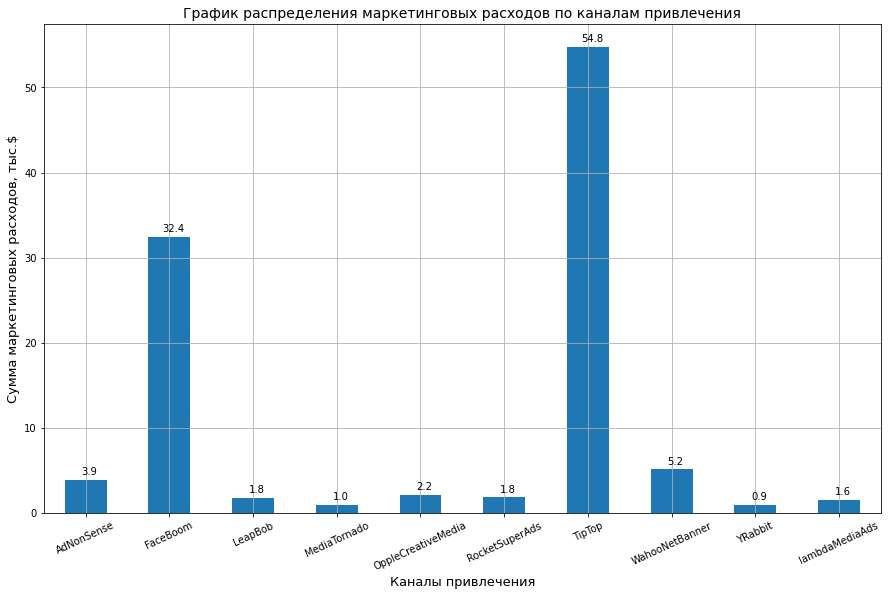

In [39]:
# построим график распределения маркетинговых расходов по каналам привлечения

ad_channel = ad_sum.groupby('channel')['cost_th'].sum().plot.bar(grid=True, figsize=(15,9))

for p in ad_channel.patches:
    ad_channel.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (4, 8), textcoords = 'offset points')

plt.xticks(rotation=25)
plt.title('График распределения маркетинговых расходов по каналам привлечения', size=14)
plt.xlabel('Каналы привлечения', size=13)
plt.ylabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.show()

Распределение маркетингового бюджета по каналам привлечения крайне поляризовано. 
На графике видно, что по общей сумме затрат на каждую рекламную площадку все источники можно разделить на 3 группы:
 - не существенные каналы привлечения с тратами до 2,5 тысяч долларов (6 площадок)
 - малозначимые каналы привлечения с тратами до 5,5 тысяч долларов (площадки WahooNetBanner и AdNonSense)
 - основные каналы привлечени с затратами более 30 тысяч долларов (площадки TipTop и FaceBoom)

Кроме того, график демонстрирует кардинальный разрыв в суммах затрат даже между двумя основными используемыми площадками: на TipTop потратили 54,8 тыс.долларов, а на FaceBoom 32,4 тыс. долларов, разница составляет более  20 тысяч долларов.

Для наглядности визуализируем структуру каналов привлечения ниже:

In [40]:
# подготовим датафрейм для построения круговой диаграммы

ad_channel = pd.DataFrame(ad_sum.groupby('channel')['cost_th'].sum().round(1)).reset_index()

ad_channel

channel  cost_th
0          AdNonSense      3.9
1            FaceBoom     32.4
2             LeapBob      1.8
3        MediaTornado      1.0
4  OppleCreativeMedia      2.2
5      RocketSuperAds      1.8
6              TipTop     54.8
7      WahooNetBanner      5.2
8             YRabbit      0.9
9      lambdaMediaAds      1.6

Напишем функцию для группировки всех не существенных каналов:

In [41]:
def other_channel(row):
    channel = row['channel']
    cost_th = row['cost_th']
    if cost_th > 30:
        return channel
    if 2.5 < cost_th < 5.5 :
        return channel
    else:
        return 'Other'
    
ad_channel['new_channel'] = ad_channel.apply(other_channel, axis=1)

ad_channel

channel  cost_th     new_channel
0          AdNonSense      3.9      AdNonSense
1            FaceBoom     32.4        FaceBoom
2             LeapBob      1.8           Other
3        MediaTornado      1.0           Other
4  OppleCreativeMedia      2.2           Other
5      RocketSuperAds      1.8           Other
6              TipTop     54.8          TipTop
7      WahooNetBanner      5.2  WahooNetBanner
8             YRabbit      0.9           Other
9      lambdaMediaAds      1.6           Other

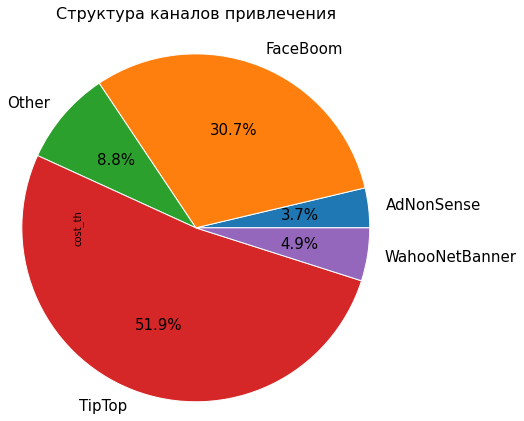

In [42]:
# построим график, отображающий структуру каналов привлечения

ad_channel.groupby('new_channel')['cost_th'].sum().plot(kind='pie',autopct='%1.1f%%', radius=2,
                                        fontsize=15, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

plt.title('Структура каналов привлечения', pad=100, size=16)
plt.show()

Совокупная доля основных рекламных каналов TipTop и FaceBoom составляет 82,6%, а малозначимых - 8,6%, оставшиеся 8,8% распределены между 6-ю не существенными источниками.

### Анализ маркетинговых расходов по месяцам

Для отображения на графиках данных в хронологическом порядке, создадим категорийный список с правильной последовательностью месяцев, по которому будем сортировать таблицы перед построением диаграмм:

In [43]:
cat_months = ['May',  'June', 'July', 'August', 'September', 'October']

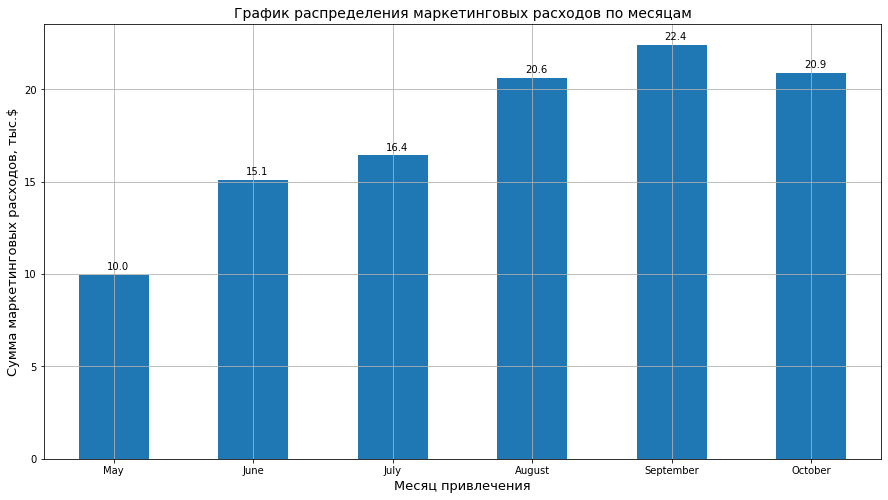

In [44]:
# сгруппируем сводную таблицу по категорийному списку с месяцами

ad_sum['month'] = pd.Categorical(ad_sum['month'], categories=cat_months, ordered=True)

# построим график распределения маркетинговых расходов по месяцам

ad_month = ad_sum.groupby('month')['cost_th'].sum().plot.bar(grid=True, figsize=(15,8))

for p in ad_month.patches:
    ad_month.annotate(f'{p.get_height():.1f}',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (4, 8), textcoords = 'offset points')

plt.xticks(rotation=0)
plt.title('График распределения маркетинговых расходов по месяцам', size=14)
plt.xlabel('Месяц привлечения', size=13)
plt.ylabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.show()

Общая сумма маркетинговых расходов составила более 105 тысяч долларов.
При анализе рекламных расходов за период с мая по октябрь 2019 мы наблюдаем постоянный ежемесячный рост в течение всего периода, за исключением последнего: в октябре сумма затрат сократилась на 1,5 тысячи долларов, практически вернувшись на уровень августа.
Ежемесячный рост затрат можно рассматривать как волнообразный:  первый скачок был в июне, когда произошло значительное увеличение бюджета на 5 тысяч долларов, а второй в августе, когда расходы выросли ещё на 4,2 тысячи долларов.

### Анализ изменения маркетинговых расходов по каналам привлечения во времени

Построим общий график по расходам на привлечение пользователей по месяцам в разрезе рекламных каналов:

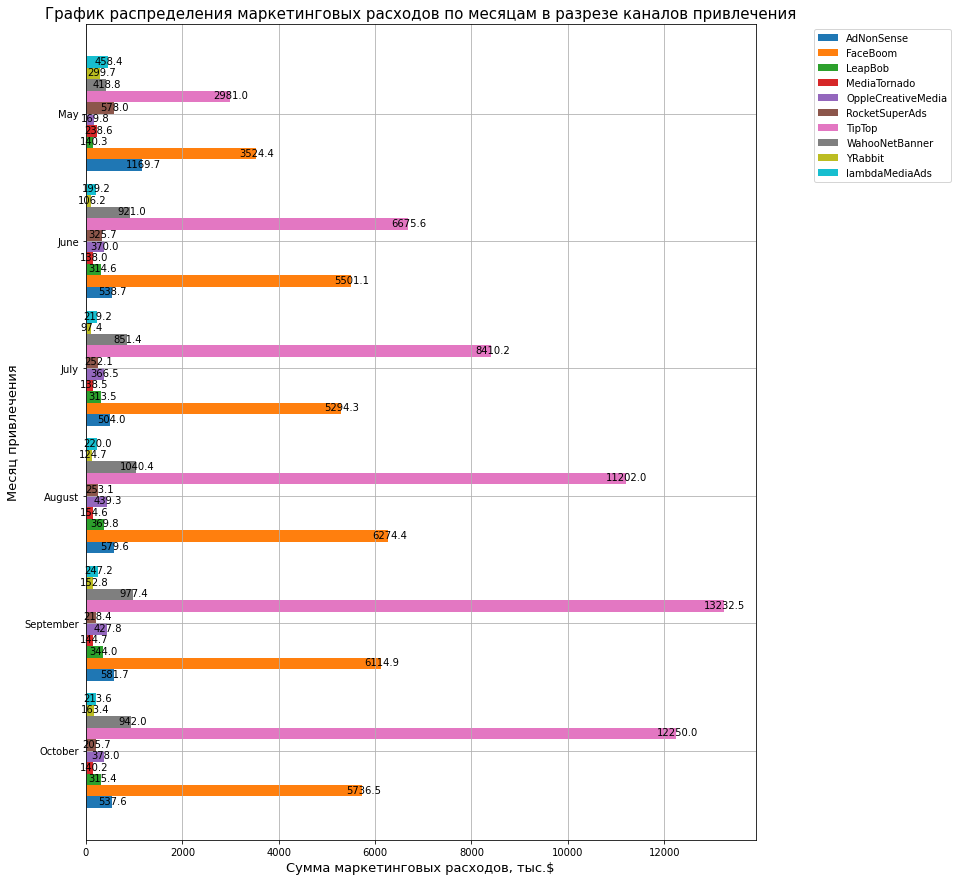

In [45]:
# сгруппируем сводную таблицу по категорийному списку с месяцами

channel_month['month'] = pd.Categorical(channel_month['month'], categories=cat_months, ordered=True)

# построим график

ad_c_m = channel_month.sort_values(by='month', ascending = False).plot.barh(grid=True, width=0.9, x='month',
                                y=['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 
                                  'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit',  'lambdaMediaAds'], 
                                   figsize=(12,15))

for p in ad_c_m.patches:
    ad_c_m.annotate(f'{p.get_width():.1f}',(p.get_width() + 0.25, p.get_y() + p.get_height() / 2), ha = 'center', 
                va = 'center', xytext = (1, 1), textcoords = 'offset points')
    
plt.legend(bbox_to_anchor=(1.3,1))
plt.xticks(rotation=0)
plt.title('График распределения маркетинговых расходов по месяцам в разрезе каналов привлечения', size=15)
plt.xlabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.ylabel('Месяц привлечения', size=13)
plt.show()

Несмотря на то, что график полноценно визуализирует все данные, он не удобен для работы. В этом случае для анализа лучше разделить графики по рекламным площадкам, сгруппировав их в категории, аналогичные введенным в иследовании к графику в п.4.2:
 - не существенные каналы привлечения с тратами до 2,5 тысяч долларов (6 площадок)
 - малозначимые каналы привлечения с тратами до 5,5 тысяч долларов (площадки WahooNetBanner и AdNonSense)
 - основные каналы привлечени с затратами более 30 тысяч долларов (площадки TipTop и FaceBoom)

Построим график расходов на привлечение пользователей по месяцам в разрезе не существенных рекламных 
каналов:

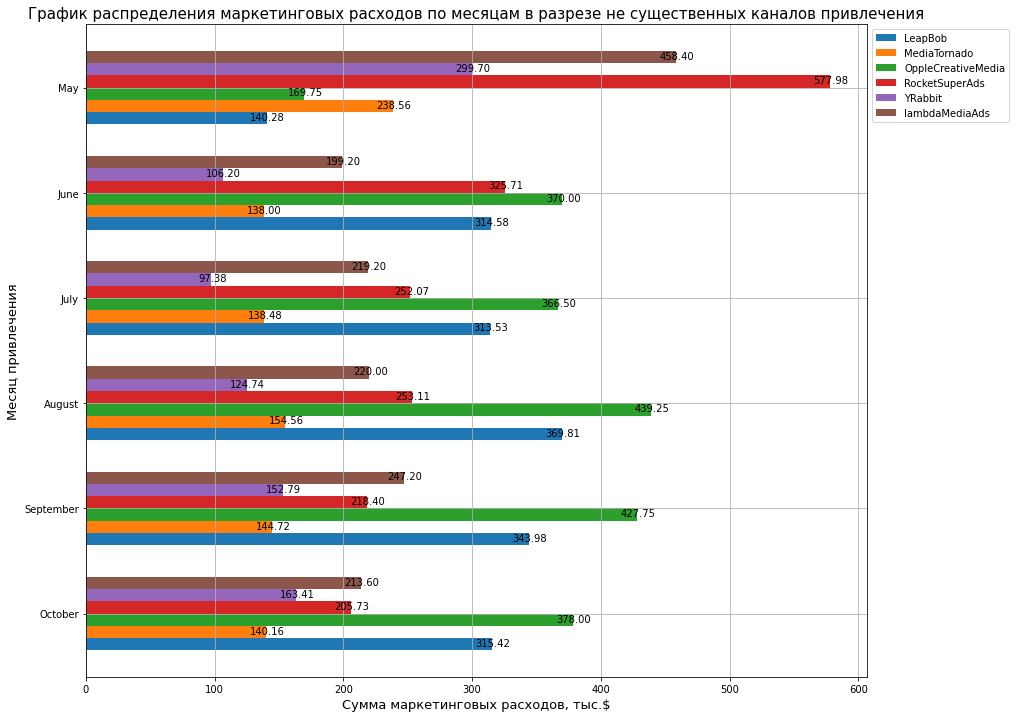

In [46]:
ad_c_m = channel_month.sort_values(by='month', ascending = False).plot.barh(grid=True, width=0.7, x='month',
                                y=['LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds',
                                  'YRabbit',  'lambdaMediaAds'], figsize=(14,12))

for p in ad_c_m.patches:
    ad_c_m.annotate(f'{p.get_width():.2f}',(p.get_width() + 0.02, p.get_y() + p.get_height() / 2), ha = 'center', 
                va = 'center', xytext = (1, 1), textcoords = 'offset points')
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.title('График распределения маркетинговых расходов по месяцам в разрезе не существенных каналов привлечения', size=15)
plt.xlabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.ylabel('Месяц привлечения', size=13)
plt.show()

Из графика сразу становится заметно, что структура каналов привлечения в мае значительно отличается от всех остальных периодов. В мае наибольшее значение имели RocketSuperAds с расходами в сумме 580 долларов и lambdaMediaAds с расходами в сумме 460 долларов. Однако с июня по октябрь расходы на эти плащадки сокращаются и, в основном, не превышают 250 долларов (исключением стал канал RocketSuperAds, на который в июле потратили 330 долларов). Расходы на остальные каналы не превышали 170 долларов в месяц.

С июня наиболее значимыми в рассматриваемой группе становятся площадки OppleCreativeMedia с расходами от 370 до 440 долларов и LeapBob: здесь расходы колеблются от 310 до 370 долларов.

Самым дорогим каналом привлечения за рассматриваемый период в данной группе разово стал RocketSuperAds (580 долларов) в мае, в остальные месяцы стоимость расходов на один канал привлечения не превыша 400 долларов.

Построим график расходов на привлечение пользователей по месяцам в разрезе малозначимых рекламных каналов:

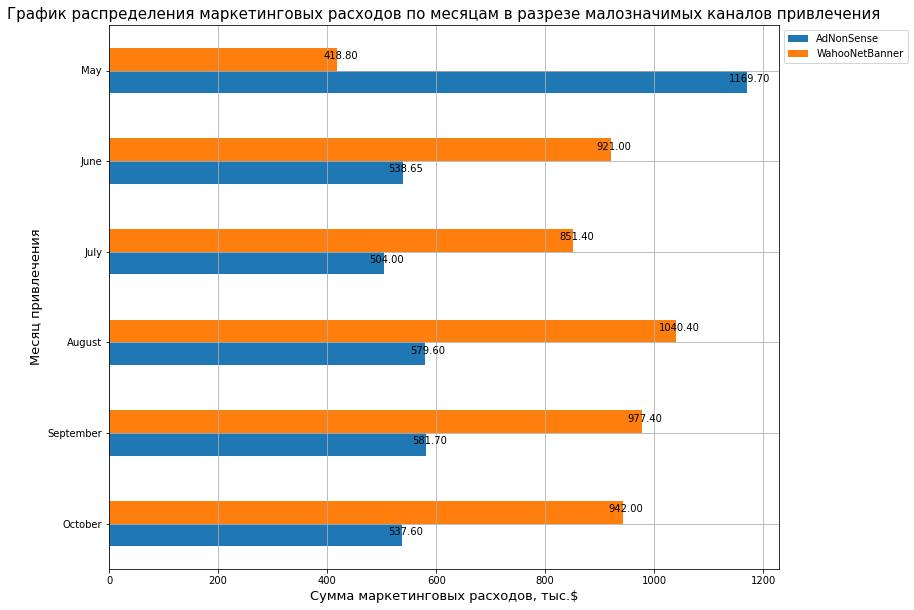

In [47]:
ad_c_m = channel_month.sort_values(by='month', ascending = False).plot.barh(grid=True, x='month',
                                y=['AdNonSense', 'WahooNetBanner'], figsize=(12,10))

for p in ad_c_m.patches:
    ad_c_m.annotate(f'{p.get_width():.2f}',(p.get_width() + 0.02, p.get_y() + p.get_height() / 2), ha = 'center', 
                va = 'center', xytext = (3,3), textcoords = 'offset points')
    
plt.legend(bbox_to_anchor=(1.2,1))
plt.xticks(rotation=0)
plt.title('График распределения маркетинговых расходов по месяцам в разрезе малозначимых каналов привлечения', size=15)
plt.xlabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.ylabel('Месяц привлечения', size=13)
plt.show()

Первое, что бросается в глаза - это кардинальная смена принципа распределения рекламного бюджета между рассматриваемыми площадками: если в мае приоритетное значение имел канал AdNonSense, то с июня предпочтение было отдано каналу WahooNetBanner. 
Разница в объемах финансирования практически в 2 раза: расходы на приоритетный канал колеблютя в районе 800-1200 долларов, тогда как на второй канал расходуется от 400 до 600 долларов.

Пик расходов на наиболее приоритетный из рассматриваемых каналов  в сумме 1170 долларов приходится на май, а минимум в сумме 850 долларов на июль.
В отношении второй площадки пик расходов был в августе и сентябрь - по 850 долларов, а минимум в мае с суммой 420 долларов.

Построим график расходов на привлечение пользователей по месяцам в разрезе основных рекламных каналов:

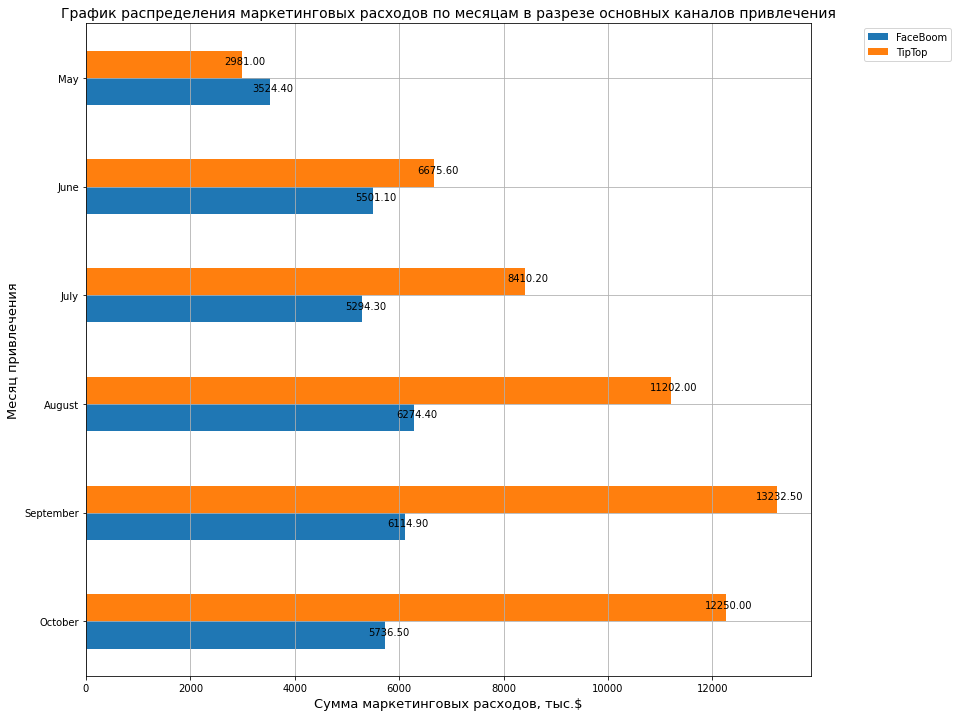

In [48]:
ad_c_m = channel_month.sort_values(by='month', ascending = False).plot.barh(grid=True, x='month',
                                y=['FaceBoom','TipTop'], figsize=(13,12))

for p in ad_c_m.patches:
    ad_c_m.annotate(f'{p.get_width():.2f}',(p.get_width() + 0.4, p.get_y() + p.get_height() / 2), ha = 'center', 
                va = 'center', xytext = (3, 3), textcoords = 'offset points')
    
plt.legend(bbox_to_anchor=(1.2,1))
plt.xticks(rotation=0)
plt.title('График распределения маркетинговых расходов по месяцам в разрезе основных каналов привлечения', size=14)
plt.xlabel('Сумма маркетинговых расходов, тыс.$', size=13)
plt.ylabel('Месяц привлечения', size=13)
plt.show()

По данным графика видно, что в мае и июне разница в объемам финансирования между рекламными площадками FaceBoom и TipTop была незначительной, хотя уже в июне 2019 произошла смена приоритетного канала привления на TipTop. Так, начиная с июля 2019, расходы на канал TipTop выросли более чем в 1,5 раза и продолжили увеличиваться каждый следующий месяц, тогда как расходы на канал FaceBoom увеличились всего на 240-770 долларов.

Таким образом, с июня по октябрь 2019 расходы на канал FaceBoom практически не изменились и, в среднем, составили 580 долларов в месяц, тогда как расходы на канал TipTop увеличивались не равномерно. Пик прироста канала TipTop приходится на август, когда затраты увеличились на 2790 долларов.

Рассмотрим измененеи структуры рекламного бюджета значимых каналов (всех, кроме не существенных) по месяцам ниже.

In [49]:
# сохраним новое название каналов в списке

new_channel_list = list(ad_channel['new_channel'])

# проверим получившийся список

new_channel_list

['AdNonSense',
 'FaceBoom',
 'Other',
 'Other',
 'Other',
 'Other',
 'TipTop',
 'WahooNetBanner',
 'Other',
 'Other']

In [50]:
# напишем функцию с условиями переименования каналов

def new_name(row):
    channel = row['channel']
    if channel in new_channel_list:
        return channel
    else:
        return 'Other'

In [51]:
# создадим новый датафрейм для построения круговых диаграмм    
    
ad_sum_rename = ad_sum
    
# переименуем каналы в таблице ad_sum_rename
    
ad_sum_rename['new_channel'] = ad_sum_rename.apply(new_name, axis=1)

ad_sum.head()

channel      month  acquisition_cost  cost_th new_channel
0  AdNonSense        May           1169.70     1.17  AdNonSense
1  AdNonSense       June            538.65     0.54  AdNonSense
2  AdNonSense       July            504.00     0.50  AdNonSense
3  AdNonSense     August            579.60     0.58  AdNonSense
4  AdNonSense  September            581.70     0.58  AdNonSense

In [52]:
# удалим не нужные столбцы

ad_sum_rename = ad_sum_rename.drop(['channel', 'acquisition_cost'], axis=1)

ad_sum_rename.head()

month  cost_th new_channel
0        May     1.17  AdNonSense
1       June     0.54  AdNonSense
2       July     0.50  AdNonSense
3     August     0.58  AdNonSense
4  September     0.58  AdNonSense

In [53]:
# напишем функцию для построения графиков структуры каналов привлечения за каждый месяц

def get_pie(df, list_month):
    
    for i in list_month:
        fig, ax = plt.subplots(figsize=(4,4), dpi=50)

        plt.title('Сруктура маркетинговых расходов за {} 2019'.format(i), size=20, pad=150)
       
        df.query('month == @i').groupby('new_channel').sum().plot(kind='pie', ax=ax, subplots=True,  
        autopct='%1.1f%%', fontsize=18, radius=2.5, startangle=0, legend=False,                                                   
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})

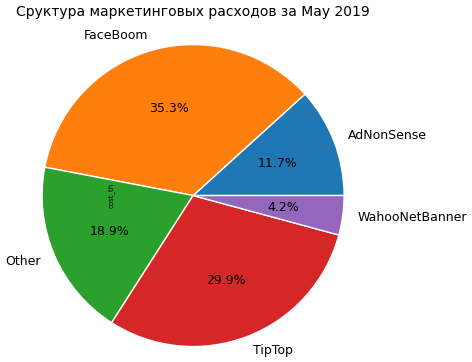

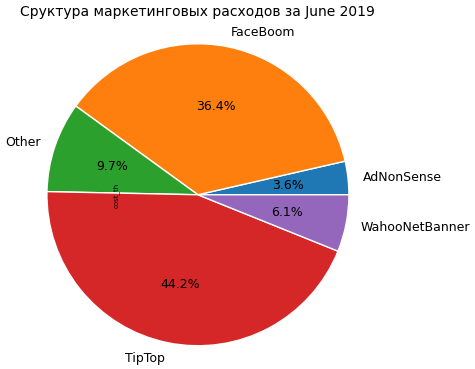

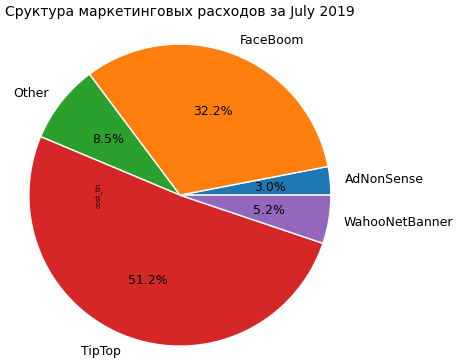

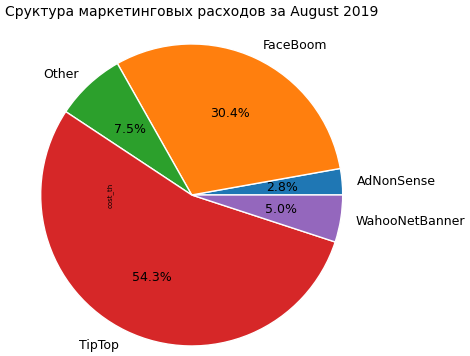

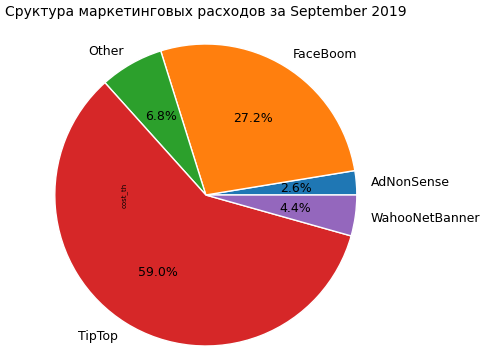

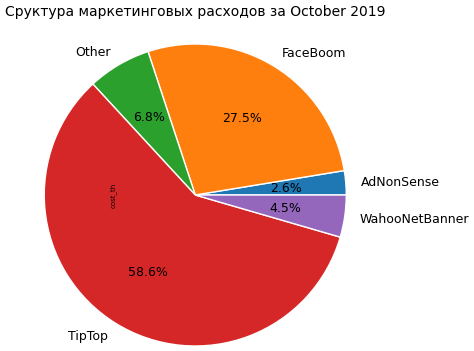

In [54]:
# построим круговую диаграмму по топ-5 платформам для региона NA

get_pie(ad_sum_rename, cat_months)

Анализируя структуру каналов привлечения за каждый месяц, мы видим, что с июня началось её планомерное изменение: ежемесячно увеличиавалась доля канала TipTop, в первую очередь, за счет сокращения доли не существенных рекламных площадок (на графике обозначены как Other). 


Так доля канала TipTop выросла практически в 2 раза: с 29,9% в мае 2019 до 58,6% в октябре, а доля не существенных каналов сократилась с 18,9% до 6,8% или в 2,8 раза.
Кроме того, несмотря на некотрый рост остальных рекламных площадок в отдельные месяцв, в целом мы наблюдаем такое же планомерное сокращение долей этих каналов. Если рассматривать изменения в структуре с точки зрения доли канала FaceBoom и совокупной доли каналов AdNonSense и WahooNetBanner, то, в среднем, сокращение их объемов происходило на 2% ежемесячно.

Доля канала привлечения FaceBoom сократилась на 22,9%: с 35,3% до 27,5%. Канал AdNonSense  претерпел существенные изменения в структуре в июне 2019, когда расходы на него упали в 3 раза с 11,7% до 3,6%, а в дальнейшем к октябрю канала потерял лишь 0,4%.

За весь рассматриваемый период канал WahooNetBanner наибольший удельный вес в структуре рекламных площадок имел в июне, когда его объем составлял 6,1%, увеличившись в 1,5 раза по сравнению с маем. Но в дальнейшем к октябрю доля канала сократилась до  4,5%, практически вернувшись к исходному состоянию в мае с объемом в 4,2%.

### Анализ САС

In [55]:
# рассчитаем среднюю стоимостью САС по источникам

cac_piv = (profiles_ad
           .pivot_table(index='channel', values='acquisition_cost')
           .round(2)
           .reset_index()
           .sort_values(by='acquisition_cost', ascending = False)
           .reset_index(drop=True))

cac_piv

channel  acquisition_cost
0              TipTop              2.80
1            FaceBoom              1.11
2          AdNonSense              1.01
3      lambdaMediaAds              0.72
4      WahooNetBanner              0.60
5      RocketSuperAds              0.41
6  OppleCreativeMedia              0.25
7        MediaTornado              0.22
8             YRabbit              0.22
9             LeapBob              0.21

In [56]:
# добавим к таблице введенную при анализе категоризацию каналов

def catagory (row):
    channel = row['channel']
    if channel == 'TipTop' or channel == 'FaceBoom':
        return 'основные'
    if channel == 'AdNonSense' or channel == 'WahooNetBanner':
        return 'малозначимые'
    else:
        return 'не существенные'
    
cac_piv['channel_cat'] = cac_piv.apply(catagory, axis=1)

cac_piv

channel  acquisition_cost      channel_cat
0              TipTop              2.80         основные
1            FaceBoom              1.11         основные
2          AdNonSense              1.01     малозначимые
3      lambdaMediaAds              0.72  не существенные
4      WahooNetBanner              0.60     малозначимые
5      RocketSuperAds              0.41  не существенные
6  OppleCreativeMedia              0.25  не существенные
7        MediaTornado              0.22  не существенные
8             YRabbit              0.22  не существенные
9             LeapBob              0.21  не существенные

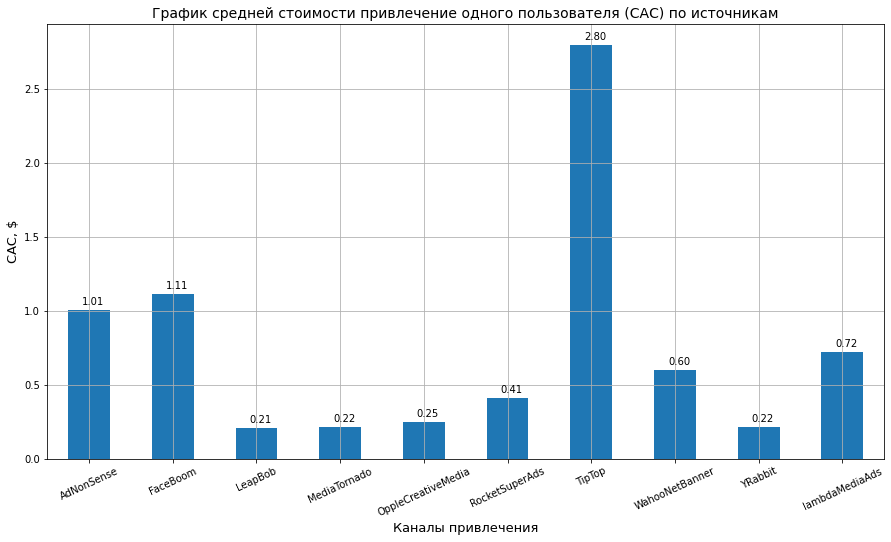

In [57]:
# визуализируем полученные данные о средей стоимости САС по каналам для наглядности

ad = profiles_ad.groupby('channel')['acquisition_cost'].mean().plot.bar(grid=True, figsize=(15,8))

for p in ad.patches:
    ad.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (4, 8), textcoords = 'offset points')

plt.xticks(rotation=25)
plt.title('График средней стоимости привлечение одного пользователя (САС) по источникам', size=14)
plt.xlabel('Каналы привлечения', size=13)
plt.ylabel('CAC, $', size=13)
plt.show()

In [58]:
# определим среднюю стоимость привлечения одного пользователя (САС) в целом для всего проекта

cac = profiles_ad['acquisition_cost'].mean().round(2)

display('Средняя стоимость привлечения одного пользователя (САС) для всего проекта составила {} $'.format(cac))

'Средняя стоимость привлечения одного пользователя (САС) для всего проекта составила 1.13 $'

Посмотрим динамику изменения САС по каналам привлечения за весь рассматриваемый период

In [59]:
# подготовим датафрейм для построения графика

profiles_ad_other = profiles_ad

profiles_ad_other['new_channel'] = profiles_ad.apply(new_name, axis=1)

profiles_ad_other.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
2  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
3  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
4  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

           dt      month  payer  acquisition_cost new_channel  
0  2019-05-07 2019-05-01   True          1.088172    FaceBoom  
1  2019-07-09 2019-07-01  False          1.107237    FaceBoom  
2  2019-08-22 2019-08-01  False          0.988235  AdNonSense  
3  2019-10-02 2019-10-01  False          0.230769       Other  
4  2019-06-30 2019-06-01   True          1.008000  AdNonSense

In [60]:
# построим сводную таблицу на основании подготовленного датафрейма

cac_channel = profiles_ad_other.pivot_table(index='dt', columns='new_channel', values='acquisition_cost', 
                                            aggfunc='mean')

cac_channel.head()

new_channel  AdNonSense  FaceBoom     Other    TipTop  WahooNetBanner
dt                                                                   
2019-05-01     1.050000  1.089423  0.409384  0.975610        0.568421
2019-05-02     0.962500  1.084722  0.382842  1.000000        0.514286
2019-05-03     1.050000  1.128947  0.384133  1.049180        0.600000
2019-05-04     1.008824  1.108943  0.357853  0.972222        0.540000
2019-05-05     1.020833  1.080531  0.370078  1.012987        0.600000

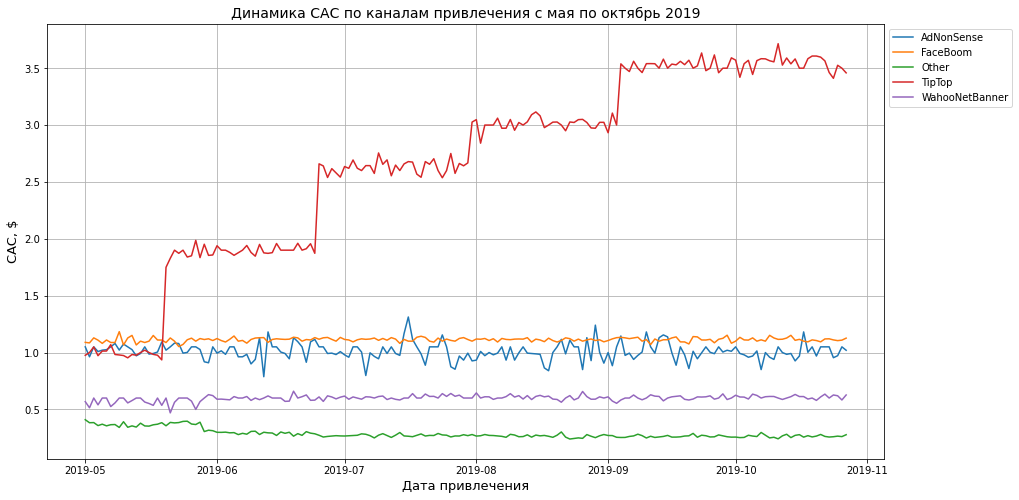

In [61]:
# построим график истории изменений CAC по каналам привлечения на основании сводной таблицы

cac_channel.plot(grid=True, figsize=(15, 8))

plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('CAC, $', size=13)
plt.xlabel('Дата привлечения', size=13)
plt.title('Динамика САС по каналам привлечения с мая по октябрь 2019', size=14)
plt.show()

Получившийся график позволяет оценить общую тенденцию изменений для каждого из рассматриваемых источников, но из-за многочисленных колебаний работать с графиком достаточно трудно и неудобно. Необходимо убрать шумы и привести данные к более равномерному распределению. Применим функцию сглаживания и построим график повторно.

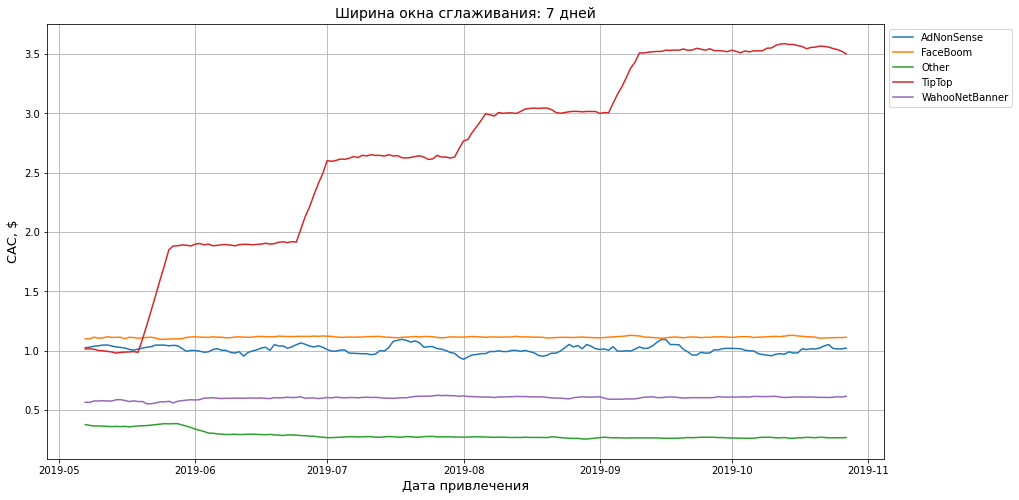

In [62]:
window = 7
filter_data(cac_channel, window).plot(grid = True, figsize=(15, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.title('Ширина окна сглаживания: {} дней'.format(window), size=14)
plt.ylabel('CAC, $', size=13)
plt.xlabel('Дата привлечения', size=13)
plt.show() 


График показывает, что стоимость привлечения новых клиентов от месяца к месяцу в сущности изменялась только в отношении источника TipTop, остальные каналы привлечения либо оставались стабильны (FaceBoom и WahooNetBanner), либо имели незначительные колебания (AdNonSense и группа Other).

TipTop - это самый дорогостоящий канал привлечения клиентов, издержки на который ежемесячно увеличиваются. Проверим полученные данные, построив графики динамики средней стоимости САС за каждый месяц по всем каналам, кроме группы Other.


In [63]:
# создадаим датафрейм для построения столбчатых диаграмм

cac_month = pd.DataFrame(data=profiles_ad, columns=['month', 'acquisition_cost', 'channel'])

cac_month.head()

month  acquisition_cost     channel
0 2019-05-01          1.088172    FaceBoom
1 2019-07-01          1.107237    FaceBoom
2 2019-08-01          0.988235  AdNonSense
3 2019-10-01          0.230769     YRabbit
4 2019-06-01          1.008000  AdNonSense

In [64]:
# заменим значения в столбце month

cac_month['month'] = pd.to_datetime(cac_month['month']).dt.month_name()

cac_month.head()

month  acquisition_cost     channel
0      May          1.088172    FaceBoom
1     July          1.107237    FaceBoom
2   August          0.988235  AdNonSense
3  October          0.230769     YRabbit
4     June          1.008000  AdNonSense

In [65]:
# сгруппируем сводную таблицу по категорийному списку с месяцами

cac_month['month'] = pd.Categorical(cac_month['month'], categories=cat_months, ordered=True)

In [66]:
# выведем на печать список каналов для получения их индексов

display(new_channel_list)

['AdNonSense',
 'FaceBoom',
 'Other',
 'Other',
 'Other',
 'Other',
 'TipTop',
 'WahooNetBanner',
 'Other',
 'Other']

In [67]:
# создадим список каналов для построения столбчатых диаграмм

channel_list = new_channel_list[0:2] + new_channel_list[6:8]

display(channel_list)

['AdNonSense', 'FaceBoom', 'TipTop', 'WahooNetBanner']

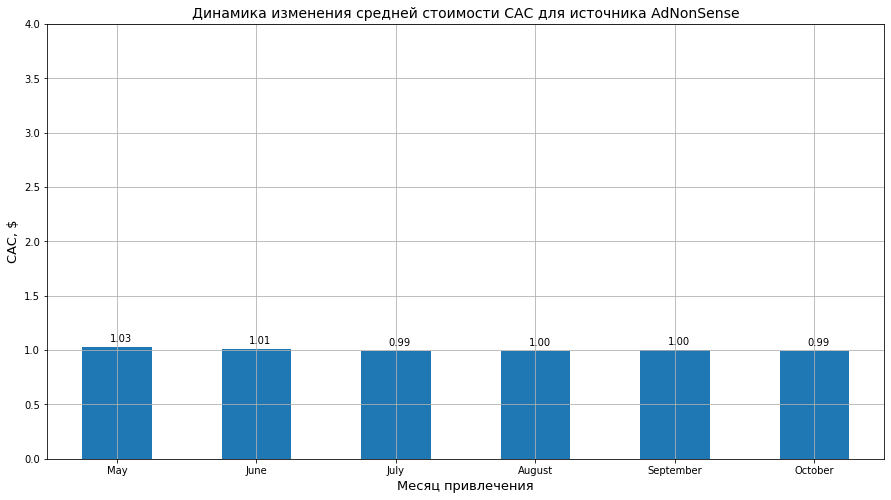

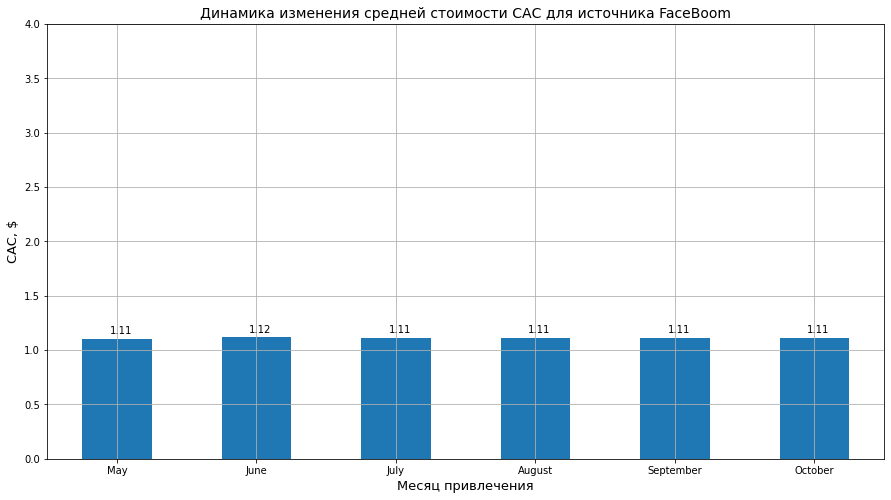

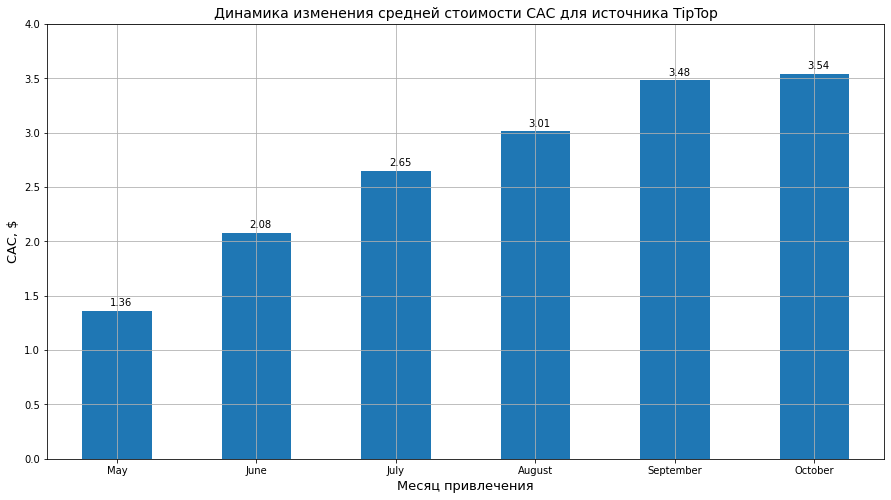

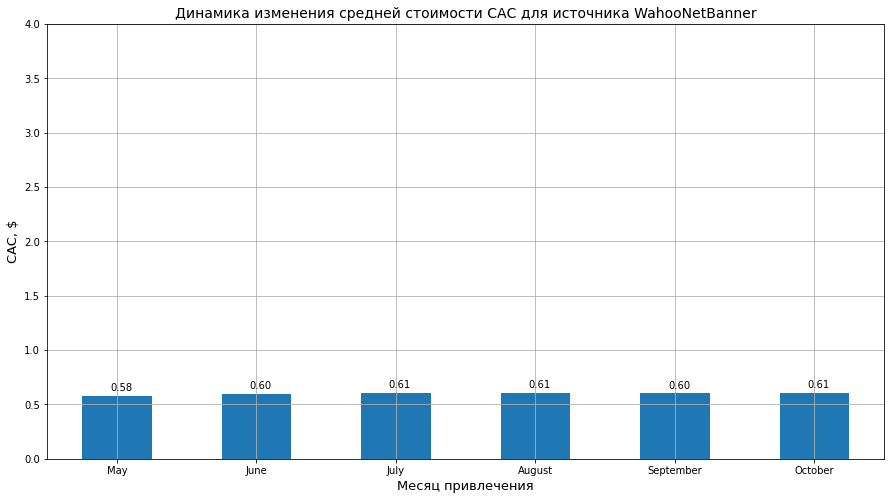

In [68]:
# напишем функцию для построения графиков динамики средней стоимости САС по каналам за каждый месяц

def get_bar(df, list_channel):
    
    for i in list_channel:
        fig, ax1 = plt.subplots()

        plt.title('Динамика изменения средней стоимости САС для источника {}'.format(i), size=14)
            
        a = (cac_month.query('channel == @i').groupby('month')['acquisition_cost']
                  .mean().plot.bar(grid=True, figsize=(15,8)))

        for p in a.patches:
            a.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                        va = 'center', xytext = (4, 8), textcoords = 'offset points')

        plt.xticks(rotation=0)
        plt.xlabel('Месяц привлечения', size=13)
        plt.ylabel('CAC, $', size=13)
        plt.ylim([0,4])

# построим графики
        
get_bar(cac_month, channel_list)

Столбчатые диагараммы подтверждают полученные ранее результаты и демонстируют ежемесячный средний показатель САС.

Обобщая полученные сведения о САС, можно сделать следующие выводы:
1. Все источники привлечения также можно разделить на три группы:
 - дешевые источники, где САС менее 50 центов 
 - источники среднего сегмента, где САС менее 1 доллара
 - дорогие источники, где САС более 1 доллара

2. Самый дешевый канал привлечения обходится приложению в 21 цент за пользователя, а самый дорогой - в 2,80 долларов.
3. Самый дорогой канал привлечения - это TipTop, его САС (2,80 долларов) в 2,5 раза выше даже по сравнению со вторым по значимости источником FaceBoom, для которого САС равен 1,11 долларов. 
4. Для TipTop наблюдается ежемесячный рост показателя САС, тогда как для FaceBoom он остается неизменным на протяжении всех рассматриваемых периодов, кроме июня, когда САС увеличился до 1,12 долларов (всего на 1 цент). Таким образом, динамика ежемесячного увеличения САС для канала TipTop коррелирует с изменениями в структуре распределения маркетинговых расходов по источникам.

### Вывод

Общая сумма маркетинговых расходов с мая по октябрь 2019 составила более 105 тысяч долларов.
На протяжении всего рассматриваемого приода мы наблюдаем ежемесячный рост  рекламных расходов, за исключением последнего месяца: в октябре сумма затрат сократилась на 1,5 тысячи долларов, практически вернувшись на уровень августа.
Ежемесячный рост затрат можно рассматривать как волнообразный:  первый скачок был в июне, когда произошло значительное увеличение бюджета на 5 тысяч долларов, а второй в августе, когда расходы выросли ещё на 4,2 тысячи долларов.

Распределение маркетингового бюджета по каналам привлечения крайне поляризовано и по общей сумме затрат на каждую рекламную площадку все источники можно разделить на 3 группы:
 - не существенные каналы привлечения с тратами до 2,5 тысяч долларов (6 площадок)
 - малозначимые каналы привлечения с тратами до 5,5 тысяч долларов (площадки WahooNetBanner и AdNonSense)
 - основные каналы привлечени с затратами более 30 тысяч долларов (площадки TipTop и FaceBoom)

Здесь важно отметить кардинальный разрыв в суммах затрат даже между двумя основными используемыми площадками: на TipTop потратили 54,8 тыс.долларов, а на FaceBoom 32,4 тыс. долларов, разница составляет более  20 тысяч долларов.

При анализе распределения маркетинговых расходов по месяцам среди не существенных каналов привлечения стоит отметить, что структура рекламных источников в мае значительно отличается от всех остальных периодов. В мае наибольшее значение имели RocketSuperAds и lambdaMediaAds, однако с июня по октябрь расходы на эти плащадки сокращаются примерно в 2 раза и, в основном, не превышают 250 долларов.
С июня наиболее значимыми в рассматриваемой группе становятся площадки OppleCreativeMedia и LeapBob с расходами от 300 до 450 долларов.

В группу малозначимых каналов входят площадки AdNonSense и WahooNetBanner. Как и в группе не существенных каналов, в июне здесь поихошла кардинальная смена приоритетов с источника AdNonSense на WahooNetBanner.  Расходы на приоритетный канал врьируются в диапазоне 800-1200 долларов, тогда как на второй канал расходуется от 400 до 600 долларов.

Среди основных рекламных каналов (TopTop и FaceBoom) в мае и июне разница в объемах финансирования была незначительной, хотя в июне также произошла смена приоритетного канала привления на TipTop. Но, начиная с июля, расходы на канал TipTop выросли более чем в 1,5 раза и продолжили увеличиваться каждый следующий месяц, тогда как расходы на канал FaceBoom увеличились всего на 240-770 долларов.

Таким образом, с июня по октябрь 2019 расходы на канал FaceBoom практически не изменились и, в среднем, составили 580 долларов в месяц, тогда как расходы на канал TipTop увеличивались не равномерно. Пик прироста канала TipTop приходится на август, когда затраты увеличились на 2790 долларов.

Анализируя структуру каналов привлечения за каждый месяц, необходимо отметить, что с июня началось её планомерное изменение: ежемесячно увеличиавалась доля канала TipTop, в первую очередь, за счет сокращения доли не существенных рекламных площадок. 

Так доля канала TipTop выросла практически в 2 раза: с 29,9% в мае 2019 до 58,6% в октябре, а доля не существенных каналов сократилась с 18,9% до 6,8% или в 2,8 раза.
Кроме того, несмотря на некотрый рост остальных рекламных площадок в отдельные месяцв, в целом мы наблюдаем такое же планомерное сокращение долей этих каналов. Если рассматривать изменения в структуре с точки зрения доли канала FaceBoom и совокупной доли каналов AdNonSense и WahooNetBanner, то, в среднем, сокращение их объемов происходило на 2% ежемесячно.

## Анализ общей окупаемости рекламы

### Анализ общего LTV и ROI

In [69]:
# изменим формат даты для корректной работы функции

profiles_ad['dt'] = pd.to_datetime(profiles_ad['dt'])

profiles_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93569 entries, 0 to 93568
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           93569 non-null  int64         
 1   first_ts          93569 non-null  datetime64[ns]
 2   channel           93569 non-null  object        
 3   device            93569 non-null  object        
 4   region            93569 non-null  object        
 5   dt                93569 non-null  datetime64[ns]
 6   month             93569 non-null  datetime64[ns]
 7   payer             93569 non-null  bool          
 8   acquisition_cost  93569 non-null  float64       
 9   new_channel       93569 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 6.5+ MB


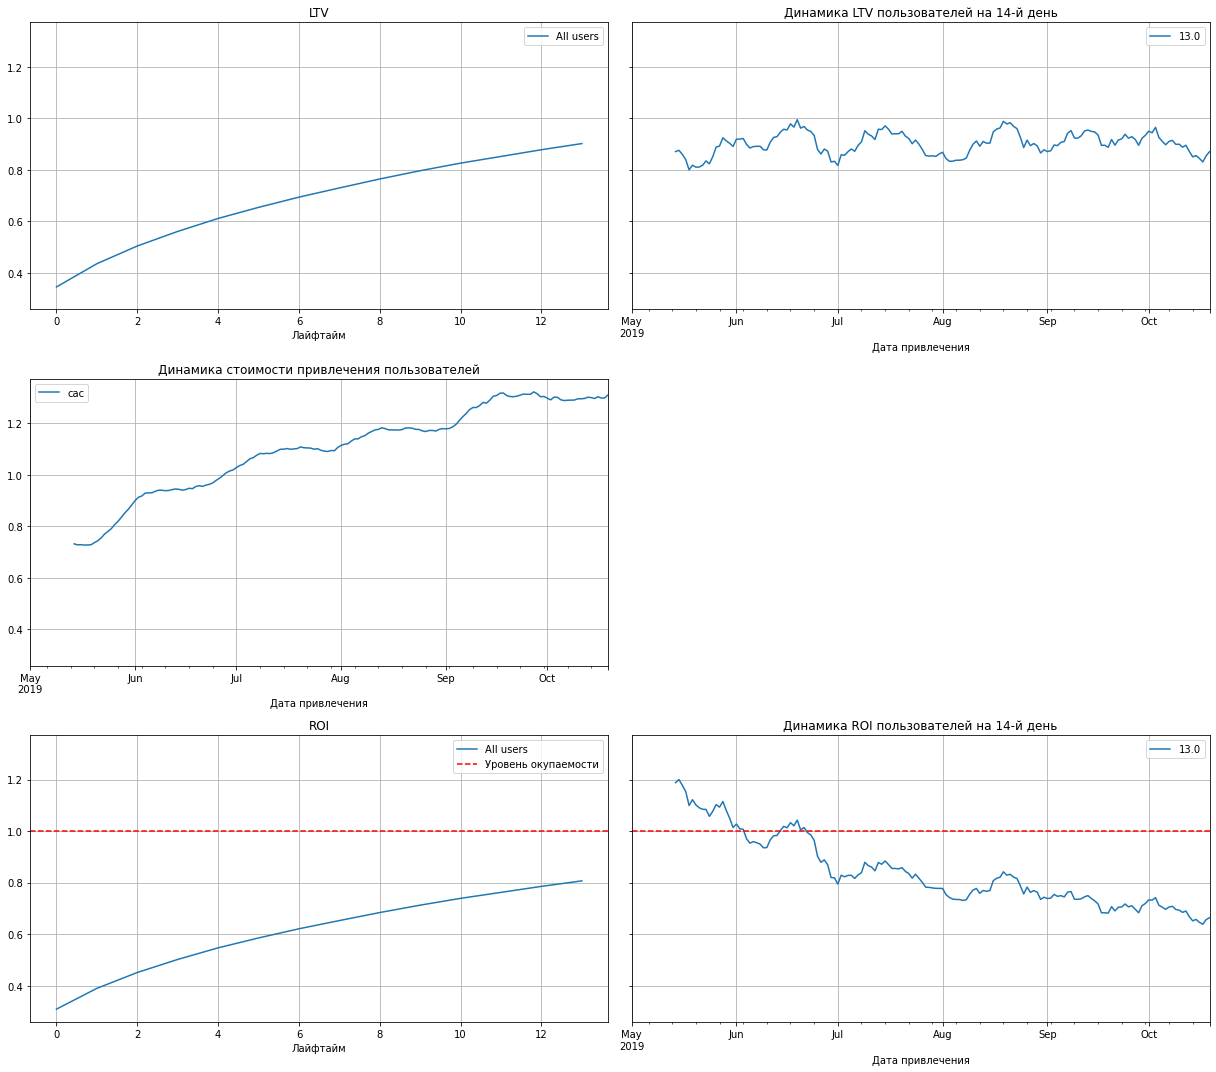

In [70]:
# получим данные об общем LTV и ROI и построим графики по ним

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_ad, 
                                                                      orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
1. Реклама не окупается, так как к 14-му дню ROI едва превысил 80%.
2. Динамика ROI выглядит как нисходящая кривая, по которой окупаемость заметно снижается к концу июня, имеет небольшой всплеск в середине июля, а затем резко падает до 80% и продолжает убывать до 60%.
3. CAC имеет устойчивую тенденцию к ежемесячному росту, несмотря на некоторое снижение показателя в течение месяца. Значит, увеличение рекламного бюджета влияет на ситуацию, но не в лучшую сторону: издержки на рекламу растут за счет дорогих источников (увеличение цены за единицу и/или объема закупаемого рекламного трафика), но это не приводит новых покупателей или их недостаточно.
4. Темпы роста САС опереждает темпы роста LTV в 1,5 раза, что и приводит к снижению ROI.

### Анализ общей конверсии

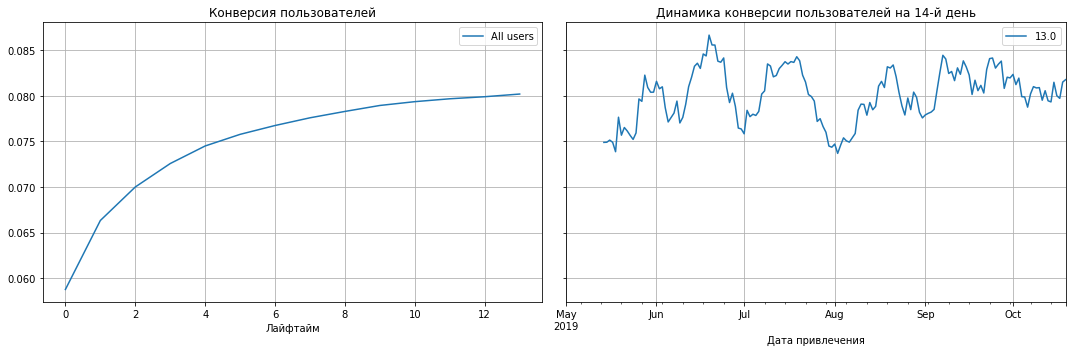

In [71]:
# посмотрим общую конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_ad, orders, observation_date,
                                                                        horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Несмотря на имеющиеся колебания в динамике конверсии, в целом показатель достаточно высокий, демонстрирует уверенный ежедневный рост и к 12-му дню достигает 8%. При таком уровне конверсии отсутствие окупаемости рекламы с большой вероятностью будет связано с низким удержанием клиентов, необходимо это проверить.

### Анализ общего удержания

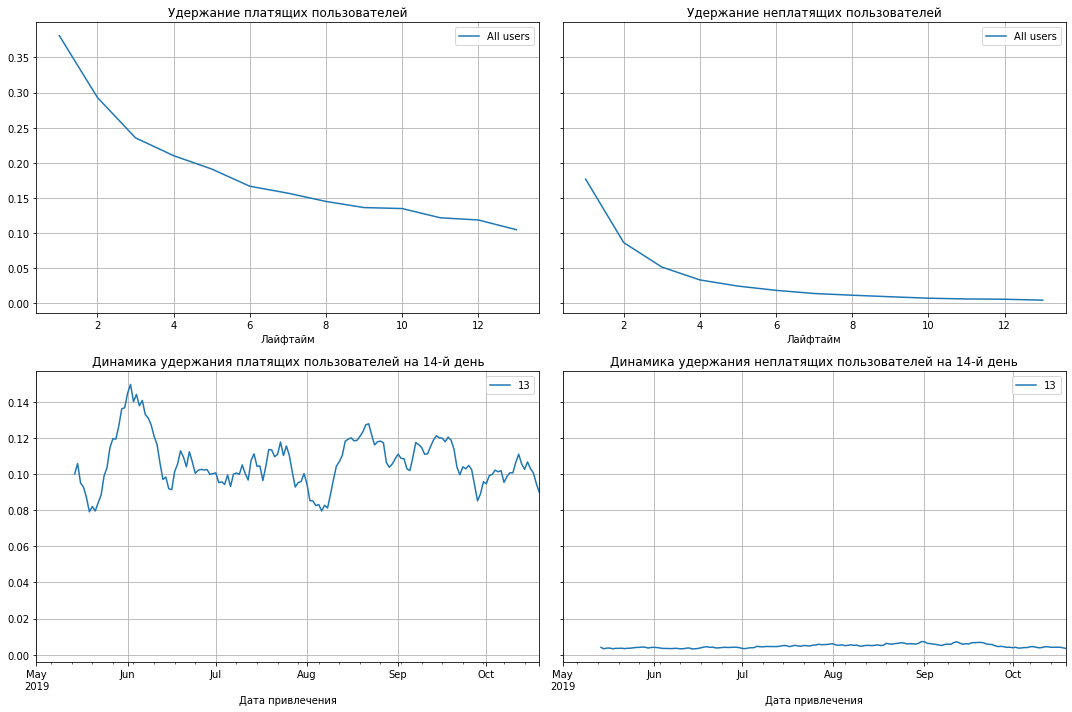

In [72]:
# посмотрим общий уровень удержания

retention_raw, retention_grouped, retention_history = get_retention(profiles_ad, visits, observation_date, 
                                                                    horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Общий уровень удержания платящих пользователей составляет чуть более 35% на 1-й день и снижается в каждый последующий, доходя до 10% к 14-му дню. Кривая динамика удержания, несмотря на вспелески, уверенно держится в районе 10% на протяжении всего рассматриваемого периода. Как и предполагалось, уровень удержания критически низкий, фактически, рассматривая показатели на 14-й день, можно говорить о том, что удержание клиентов отсутствует.

### Вывод

Несмотря на имеющиеся колебания в динамике конверсии, в целом показатель достаточно высокий, демонстрирует уверенный ежедневный рост и к 12-му дню достигает 8%. При таком уровне конверсии отсутствие окупаемости рекламы с большой вероятностью будет связано с низким удержанием клиентов.

Общий уровень удержания платящих пользователей в среднем составляет 10% на протяжении всего рассматриваемого периода. Как и предполагалось, уровень удержания критически низкий, можно говорить о том, что удержание клиентов отсутствует.


Кроме того, CAC имеет устойчивую тенденцию к ежемесячному росту и его темпы роста опереждает темпы роста LTV в 1,5 раза, что приводит к снижению ROI. Кривая динамика ROI демонстриуем падаение с первого месяца и к октябрю снижается до 60%.

В итоге реклама не окупается, так как к 14-му дню ROI едва превышает 80%.

## Анализ окупаемость рекламы с разбивкой по устройствам

### Анализ LTV и ROI в разрезе устройств

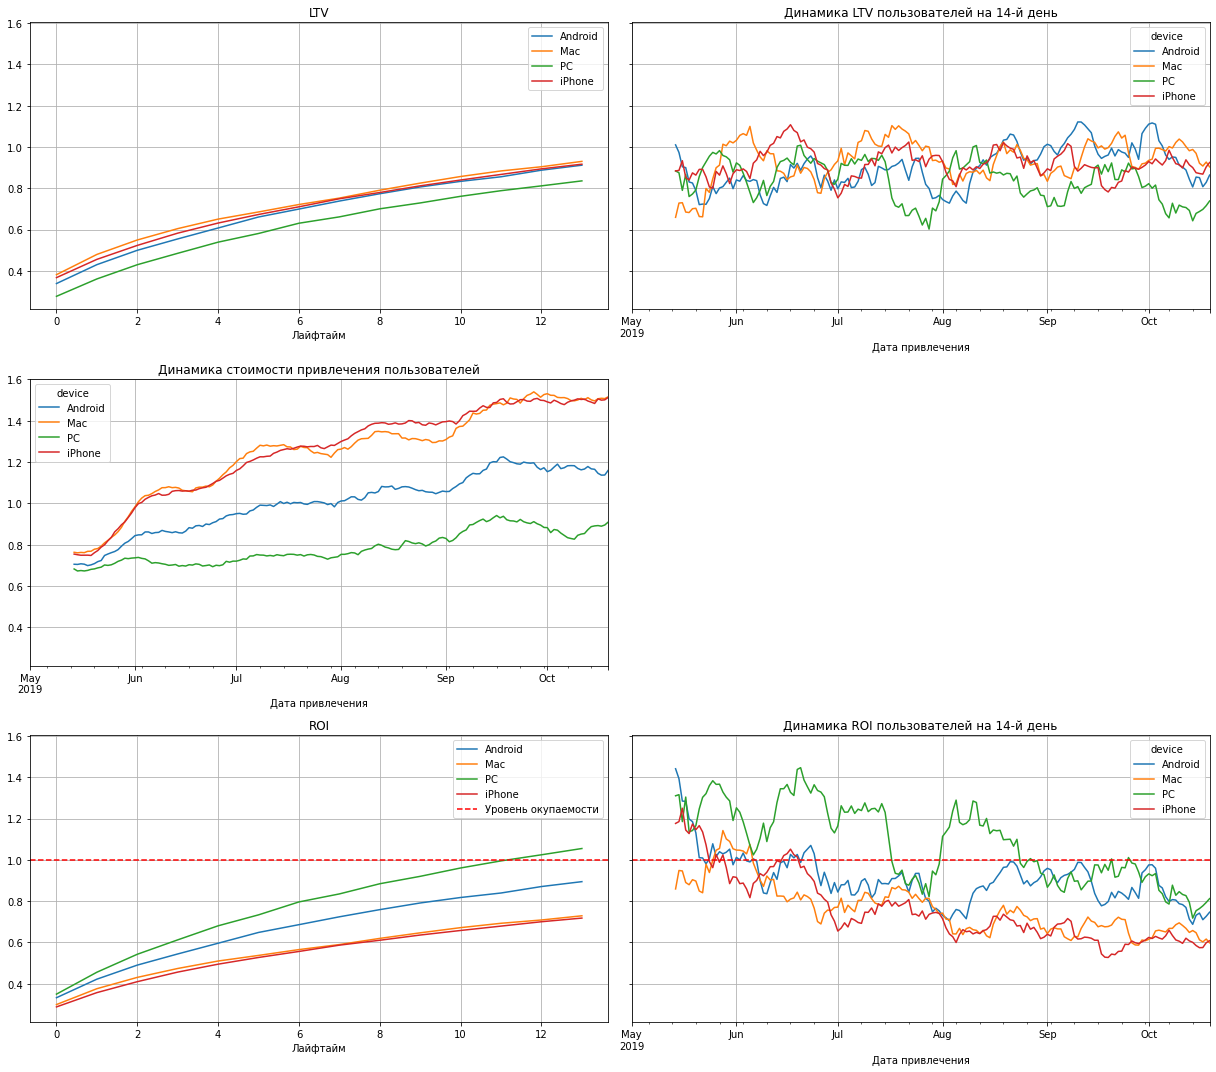

In [73]:
# получим данные о LTV и ROI в разрезе устройств и построим графики по ним

(ltv_raw_device, ltv_grouped_device, ltv_history_device, 
 roi_grouped_device, roi_history_device) = get_ltv(profiles_ad, orders, observation_date, horizon_days, 
                                                   dimensions=['device'])

# строим графики
plot_ltv_roi(ltv_grouped_device, ltv_history_device, roi_grouped_device, roi_history_device, horizon_days) 


1. LTV для всех устройств растет и находится на одном уровне, за исключением PC. LTV PC имеет общую тенденцию роста, но более низки показатели. На 14-й день LTV ни одного из устройств не превышает 1 доллара.
2. Динамика LTV пользователей на 14-й день имеет значительные колебания независимо от устройств, но достаточно стабильна и находится в коридоре от 70 центов до 1,10 долларов.
3. На начало периода показатель САС для всех устройств был достаточно близок по отношению друг к другу и составлял порядка 70-80 центов за одного пользователя, однако, со второй половины мая наблюдается постепенный ежемесячный рост для всех устройств, кроме PC. Динамика САС показывает уверенный рост показателя для PC только с августа, а до этого, несмотря на незначительные колебания, он был на достаточно неизменном уровне. Темпы роста САС для устройств iPhone и Mac имеют близкие значения и существенно опережают темпы роста САС для остальных устройств.
4. Окупаемость рекламы можно наблюдать только в отношении пользователей, использующих PC. Для пользователей с утройствами Android окупаемость достигает 90%, а для остальных устройств всего 75%.
5. Динамика ROI показывает, что независимо от типа устройств показатель ROI практически перестает превышать отметку окупаемиости (незначительные выбросы не влияют на тенденцию), начиная со второй половины августа и в дальнейшем имеет тенденцию к снижению, несмотря на всплески. Уровень падения ROI в динамике составляет от 80% до 50%.

Реклама окупается только в отношении пользователей, использующих PC, при этом она наступает только на 10-й день.
Окупаемость рекламы на PC имеет лучшие показатели при худшем LTV, а тампы роста CAC для Android, iPhone и Mac существенно превышаю темпы роста САС для PC. Значит, качество пользоватлей на Android, iPhone и Mac выше, чем на PC.

### Анализ конверсии в разрезе устройств

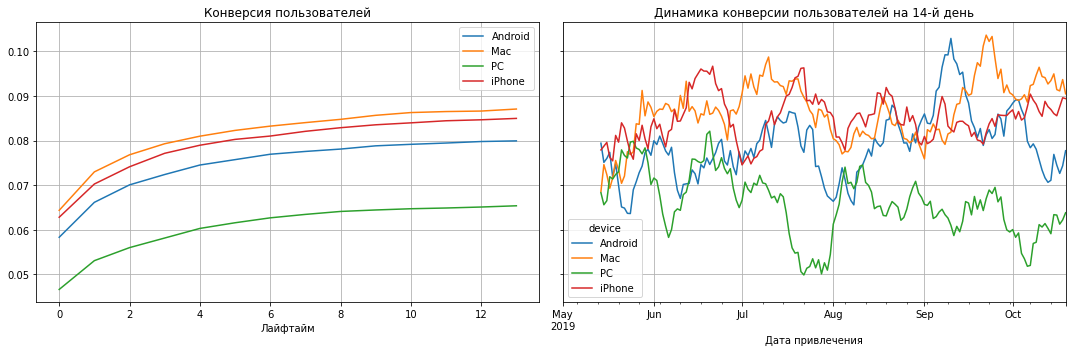

In [74]:
# посмотрим конверсию по устройствам

conversion_raw_device, conversion_grouped_device, conversion_history_device = get_conversion(profiles_ad, orders,
                                                            observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped_device, conversion_history_device, horizon_days)

Пользователи всех устройств имеют стабильную конверсию с одинаковой для всех тенденцией постепенного роста показателя день за днем. Устройства iPhone и Mac имею самую высокую конверсию и к 14-му дню она выше 8%. Среди всех устройств самый низкий уровень конверсии на PC, но сам по себе показатель достаточной неплохой - 6,5%.
В целом, с учетом наблюдаемой тенденции роста конверсии никаких проблем с конвертацией пользоватлей нет, необходимо проверить их удержание.

### Анализ удержания в разрезе устройств

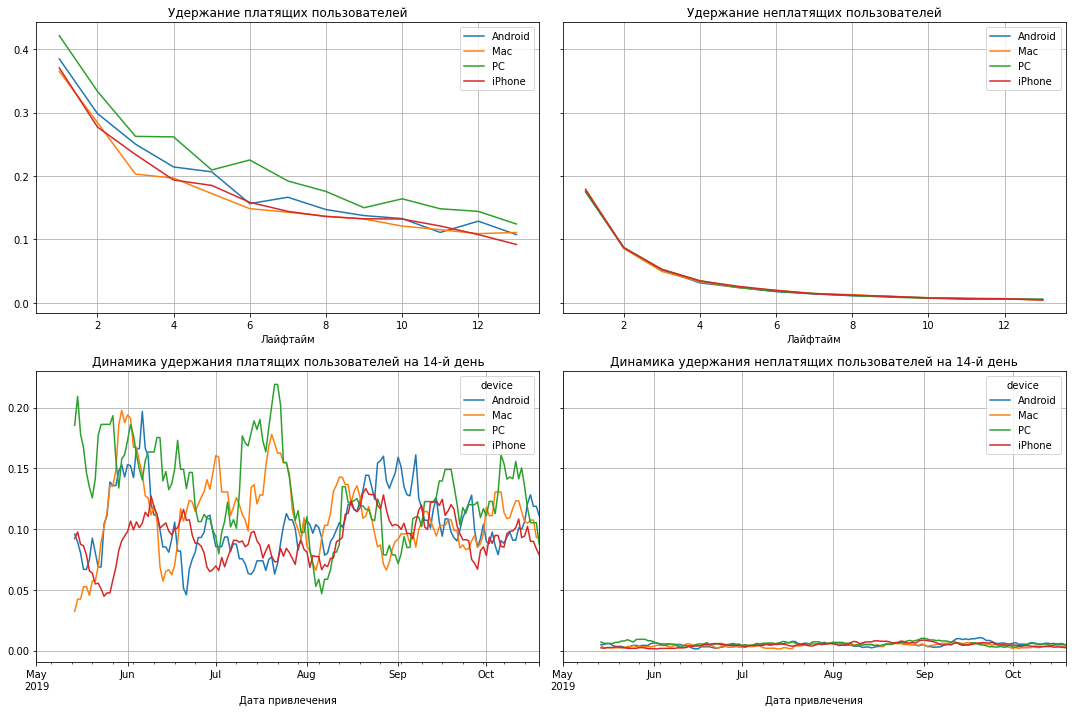

In [75]:
# посмотрим уровень удержания в разрезе устройств

retention_raw_device, retention_grouped_device, retention_history_device = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped_device, retention_history_device, horizon_days) 

Пользователи всех устройств стабильно плохо удерживаются - уровень удержания платящих пользователей составляет менее 40% на 1-й день и к 14-му дню снижается в 4 раза, опускаясь до отметки в 10% и менее. Необходимо отметить, что уровень удержания платящих пользователей на PC самый высокий, тогда как качественные пользователи, использующие наиболее конвертируемые устройства, имеют самы низкие показатели удержания.

### Вывод

Пользователи всех устройств имеют стабильную конверсию выше 6% с одинаковой для всех тенденцией постепенного роста показателя день за днем. Устройства iPhone и Mac имею самую высокую конверсию, уровень которой к 14-му дню превышает 8%.
Качество пользоватлей на Mac, iPhone и Android значительно (в 1,5-2 раза) выше, чем на PC. Несмотря на это, реклама окупается только в отношении пользователей, использующих PC, при этом она наступает только на 10-й день.

Пользователи всех устройств стабильно плохо удерживаются - уровень удержания платящих пользователей составляет менее 40% на 1-й день и к 14-му дню снижается в 4 раза, опускаясь до отметки в 10% и менее. При этом уровень удержания платящих пользователей на PC самый высокий, тогда как покупатели, использующие наиболее конвертируемые устройства, имеют самы низкие показатели удержания. Вероятно, у клиентов на Android, Mac и iPhone возникают какие-то технические ошибки при использовании приложения, из-за чего их удержание ниже, а реклама и вовсе не окупается. 

Тем не менее, при стабильном росте LTV и конверсии клиентов в покупателей, а также самом низком уровне CАС, удержание платящих клиентов на PC находится на слишком низком уровне, а динамика ROI имеет тенденцию к снижению. Возможно, что приложение недостаточно адаптировано под использование его на PC, из-за чего при достижении какого-то уровня (рейтинга/отметки/выполнения задания), дальнейшее использование приложени на PC для покупателя становится неудобным или невозможным, поэтому они отказываются от него.

## Анализ окупаемости рекламы с разбивкой по странам

### Анализ LTV и ROI в разрезе стран

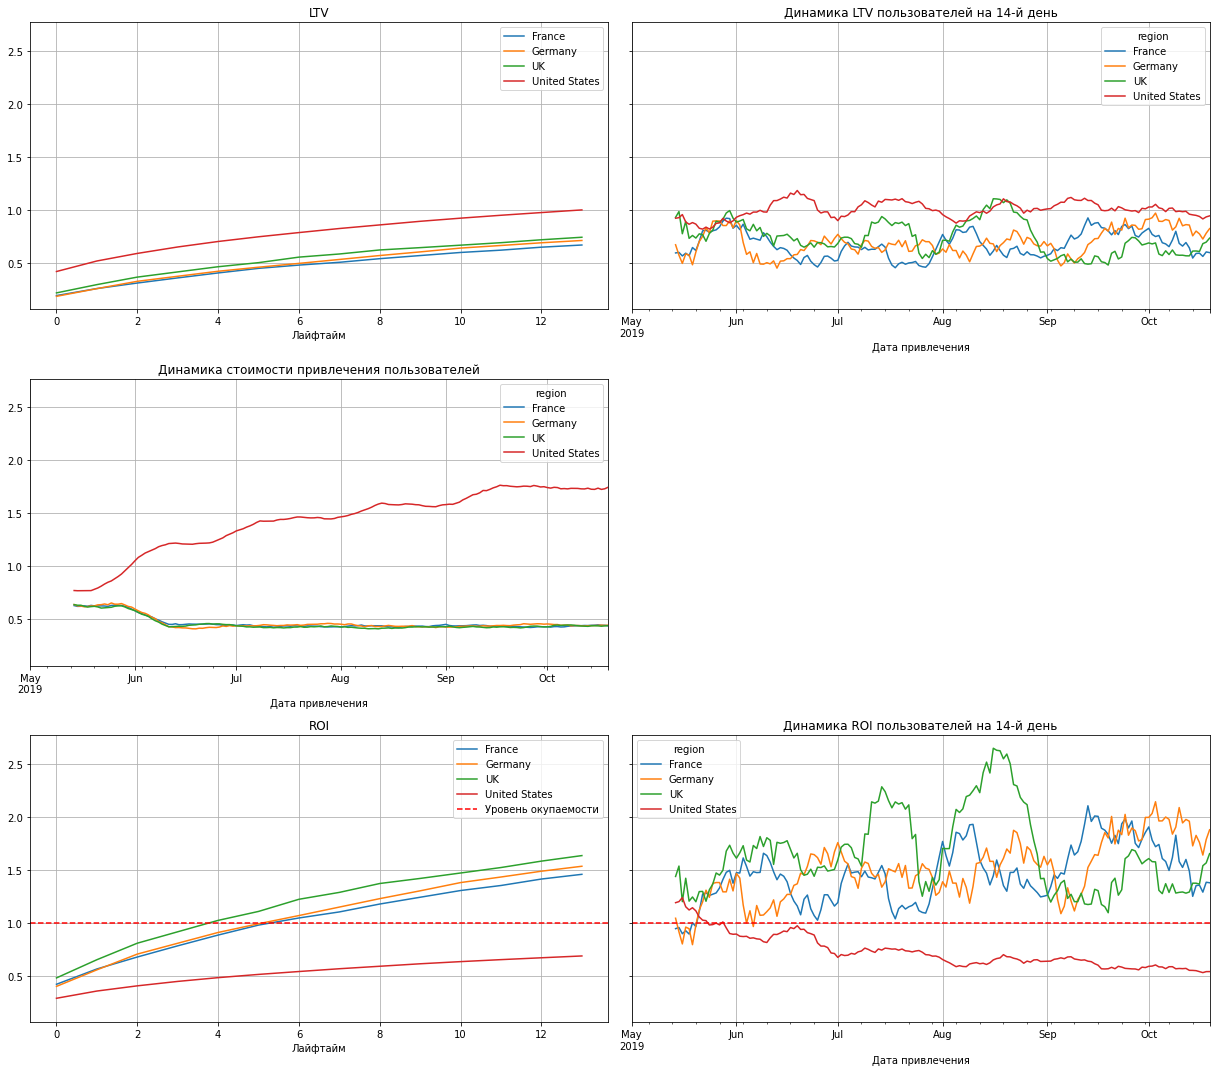

In [76]:
# получим данные о LTV и ROI в разрезе стран и построим графики по ним

(ltv_raw_region, ltv_grouped_region, ltv_history_region, 
 roi_grouped_region, roi_history_region) = get_ltv(profiles_ad, orders, observation_date, horizon_days, 
                                                   dimensions=['region'])

# строим графики
plot_ltv_roi(ltv_grouped_region, ltv_history_region, roi_grouped_region, roi_history_region, horizon_days) 


При анализе показателей по странам видно, что:
1. На всех построенных графиках (LTV, CAC, ROI) резко выделяется регион США. В нём более высокий уровень LTV как в целом, так и в динамике, и хотя кривая динамики (пики) отличается от кривых динамики в европеском регионе, можно наблюдать общую для всех регионов тенденцию сохранения одного уровня LTV.
2. График LTV в евопейских странах показывает стабильный рост примерно на одном уровне, если сравнивать регионы между собой (за исключением США).
3. Динамика САС в США кардинально отличается от динамики в остальных регионах: с середины мая уровень САС в Америке начинает ежемесячно расти, тогда как в остальных регионах он мало подвержен изменениям на протяжении всего рассматриваемого периода.
4. Начиная с июня в США темпы роста уровня САС превышают темпы роста LTV.
5. Динамика САС в европейском регионе имеет незначительные колебания, несмотря на снижение своего уровня в перый месяцы с 60 до 40 центов. Примерно со второй недели июня уровень САС остается практически неизменным.
6. Реклама в европейских странах окупается, начиная с 3-4 дня привлечения покупателей. ROI в этих странах растет и на конец периода приближается к 170%.
7. Показатели ROI как в целом, так и в динамике в США кардинально отличаются от этих же показателей стран европейского региона. Реклама в США не окупается, а кривая динами ROI показывает тенденцию ежемесячного снижения, несмотря на некоторый рост каждые 2 недели. Вероятно, привлечение новых пользователей дает краткосрочный эффект увеличения показателя, но качественно не влияет на ситуацию.

Подводя итог, вывод один: несмотря на самый высокий уровень LTV среди всех регионов, проблемы с окупаемостью рекламы наблюдаются только в США.

### Анализ конверсии в разрезе стран

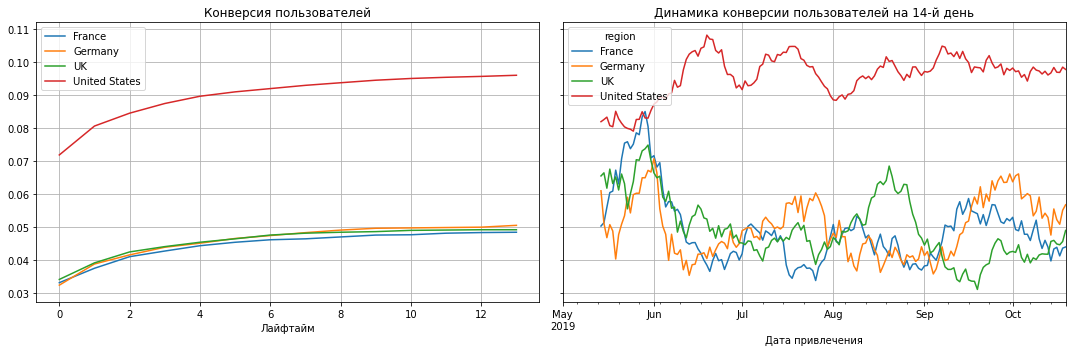

In [77]:
# посмотрим конверсию в разрезе стран

(conversion_raw_region, conversion_grouped_region, 
 conversion_history_region) = get_conversion(profiles_ad, orders, observation_date, horizon_days, 
                                             dimensions=['region'])

plot_conversion(conversion_grouped_region, conversion_history_region, horizon_days)

Пользователи из США имеют почти 10%-ю конверсию, тогда как в европейском регионе она в 2 раза ниже. Конверсия в 5% - неплохой показатель, но это потенциальная точка роста для приложения в европейских странах и поэтому его нужно улучшать в будущем.

### Анализ удержания в разрезе стран

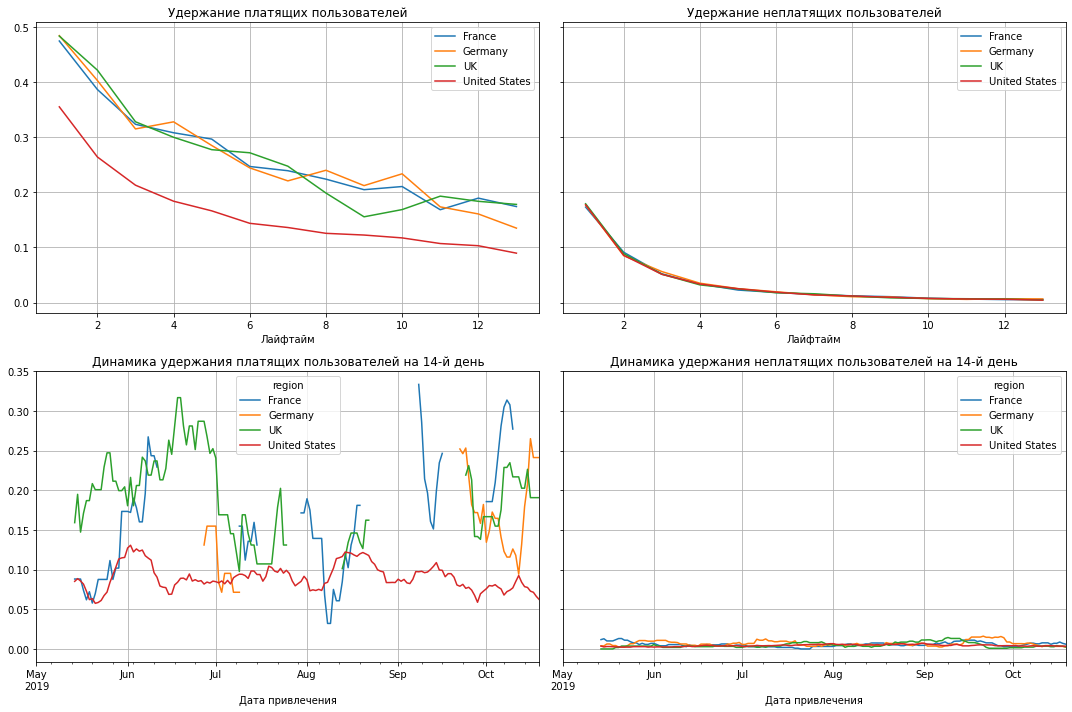

In [78]:
# посмотрим уровень удержания в разрезе стран

retention_raw_region, retention_grouped_region, retention_history_region = get_retention(profiles_ad, visits, 
                                                            observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped_region, retention_history_region, horizon_days) 

Удержание платящих пользоватлей во всех регионах ниже 50% на 1-й день, а на 14-й день уровень удержания находится в диапазоне от 10% до 20%. Худший показатель удержания приходится на США - около 10%, где уровень удержания пользователей в 1,5-2 раза ниже, чем в европейском регионе.

Динамика удержания платящих пользователей в Германии и Франции прерывистая, значит качество пользователей из этих стран ниже, чем в Англии и США.

### Вывод

Обобщая анализ окупаемости рекламы по странам, можно обозначить проблемный регион - США.

 Пользователи из США имеют:
 - почти 10%-ю конверсию в покупателей, тогда как в европейском регионе она в 2 раза ниже,
 - более качественных пользователей, по сравнению с Германией и Францией (сплошная кривая динамики удержания платящих пользователей),
 - самый высокий уровень LTV среди всех регионов: он достигает 1 доллара на 14-й день,
 - худший показатель удержания: в районе 10% на 14-й день, что в 1,5-2 раза ниже, чем в европейском регионе.

## Анализ окупаемости рекламы с разбивкой по рекламным каналам

### Анализ LTV и ROI в разрезе рекламных каналов

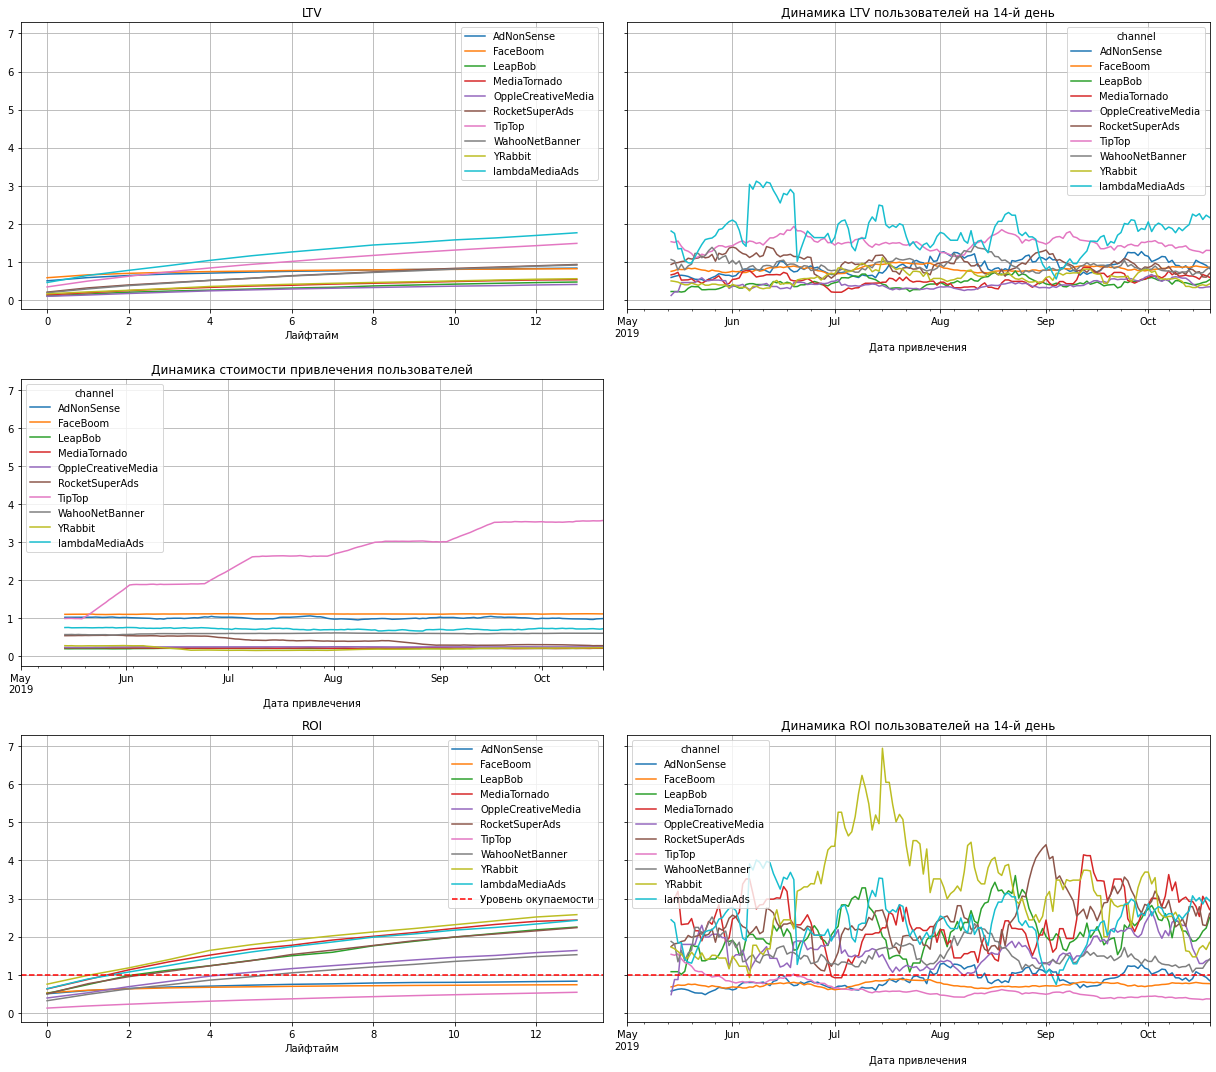

In [79]:
# получим данные о LTV и ROI в разрезе источников и построим графики по ним

(ltv_raw_channel, ltv_grouped_channel, ltv_history_channel, 
 roi_grouped_channel, roi_history_channel) = get_ltv(profiles_ad, orders, observation_date, horizon_days, 
                                                     dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped_channel, ltv_history_channel, roi_grouped_channel, roi_history_channel, horizon_days) 

Так как  рекламных каналов много (10), то работать одновременно со всеми неудобно, потому что графики становятся практически не читаемыми. 
При таком варианте можно только заменить резко выделяющиеся значения:
1. Лучшие показатели LTV (выше 1,5 долларов) относятся к каналам TipTop и lambdaMediaAds, то есть, эти каналы приносят наиболее качественных пользователей.
2. Стоимость привлечения пользователей (САС) практически неизменна для всех каналов (кривая динамики на графике параллельна оси x), кроме TipTop. Расходы на последний ежемесячно кратно увеличиваются и превышают расходы на любой другой канал в 4 и более раза.
3. Реклама каналов привлечения TipTop, FaceBoom и AdNonSense, то есть практически всех самых значимых источников, не окупается, несмотря на тенденцию роста (показатель стремится к 100%). ROI для FaceBoom и AdNonSense располагается на графике практически параллельно уровню окупаемости и составляет 80%-95%. Окупаемость канала TipTop равна примерно 65%-70%.
4. Худша динамика ROI у каналов TipTop, FaceBoom и AdNonSense - кривые стабильно находятся ниже отметки окупаемости.
5. Максимальная окупаемость рекламы у каналов YRabbit, MediaTornado, lambdaMediaAds.

Для более детельного анализа необходимо разбить анализируемый показатель (каналы) на группы.

In [80]:
# создадаим датафрейм

profiles_ad_channel = profiles_ad

profiles_ad_channel['new_channel'] = profiles_ad.apply(new_name, axis=1)

profiles_ad_channel.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
2  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
3  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
4  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

          dt      month  payer  acquisition_cost new_channel  
0 2019-05-07 2019-05-01   True          1.088172    FaceBoom  
1 2019-07-09 2019-07-01  False          1.107237    FaceBoom  
2 2019-08-22 2019-08-01  False          0.988235  AdNonSense  
3 2019-10-02 2019-10-01  False          0.230769       Other  
4 2019-06-30 2019-06-01   True          1.008000  AdNonSense

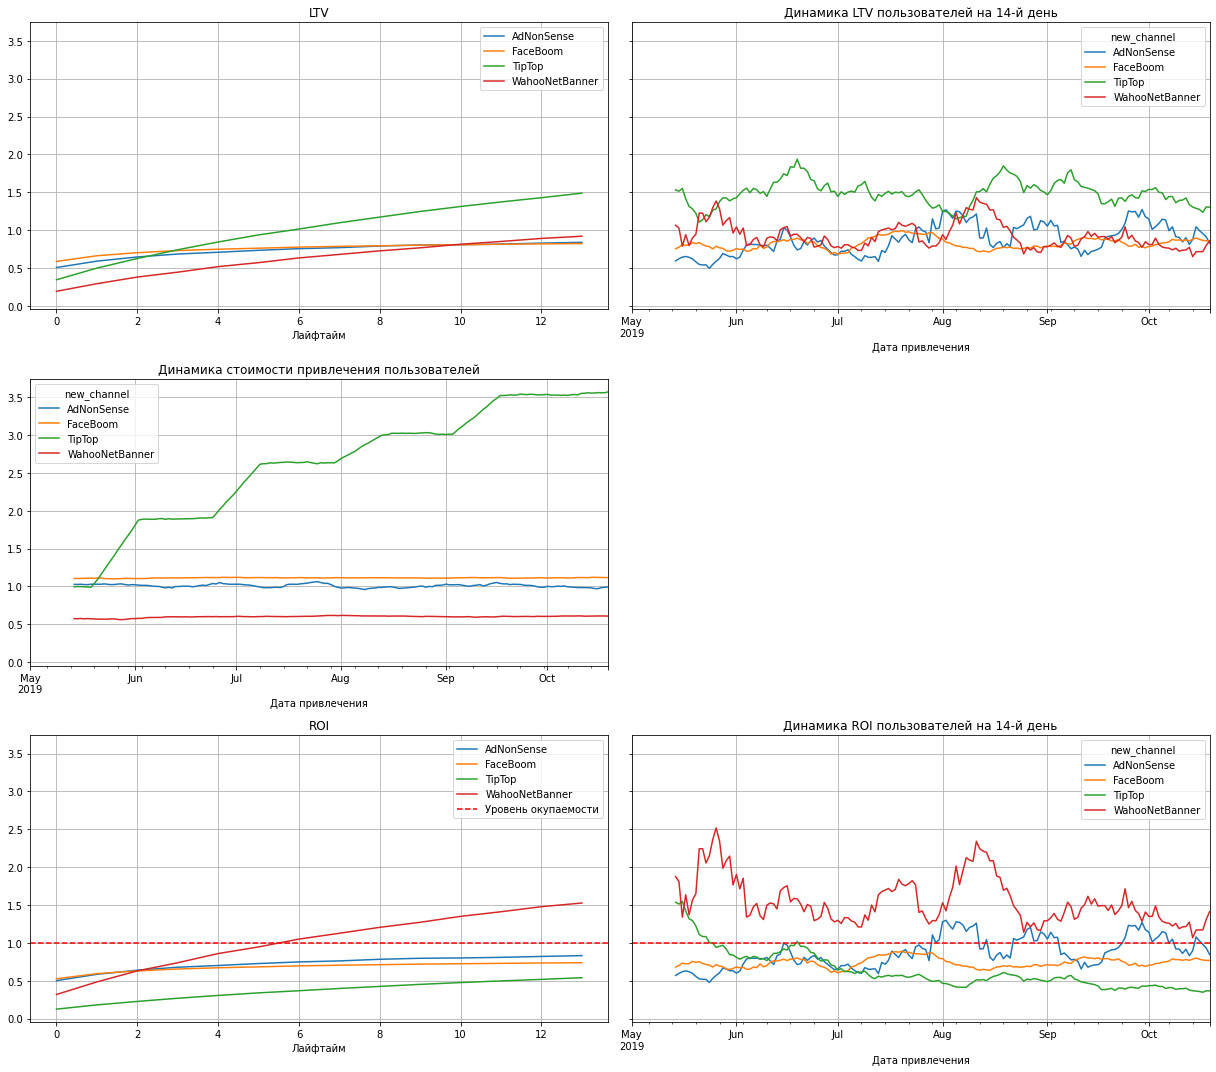

In [81]:
# получим данные о LTV и ROI в разрезе значимых источников (малозначимые и основные каналы) и построим графики по ним

(ltv_raw_new_channel, ltv_grouped_new_channel, ltv_history_new_channel, 
 roi_grouped_new_channel, roi_history_new_channel) = get_ltv(profiles_ad_channel.query('new_channel != "Other"'), 
                                                orders, observation_date, horizon_days, dimensions=['new_channel'] )

# строим графики
(plot_ltv_roi(ltv_grouped_new_channel, ltv_history_new_channel, roi_grouped_new_channel, roi_history_new_channel, 
              horizon_days))

1. Лучший показатель LTV у канала TipTop - 1,5 доллара.
2. Каналы FaceBoom и AdNonSense имеют идентичные показатели LTV, которые показывают рост только в первые два дня, а затем неизменно держатся на уровне 70 центов.
3. Расходы на привлечение пользователей для канала TipTop ежемесячно кратно увеличиваются и превышают расходы на любой другой канал. К октябрю САС канала TipTop равен 3,5 долларам.
4. Реклама окупается только для канала WahooNetBanner, начиная с 5-го дня, и на конец периода окупаемость составляет 160% долларов, а окупаемость канала TipTop едва превышает 50%.
5. Кривая динамики ROI стабильно превышает отметку окупаемости только для канала WahooNetBanner, остальные каналы в основном находятся ниже неё.

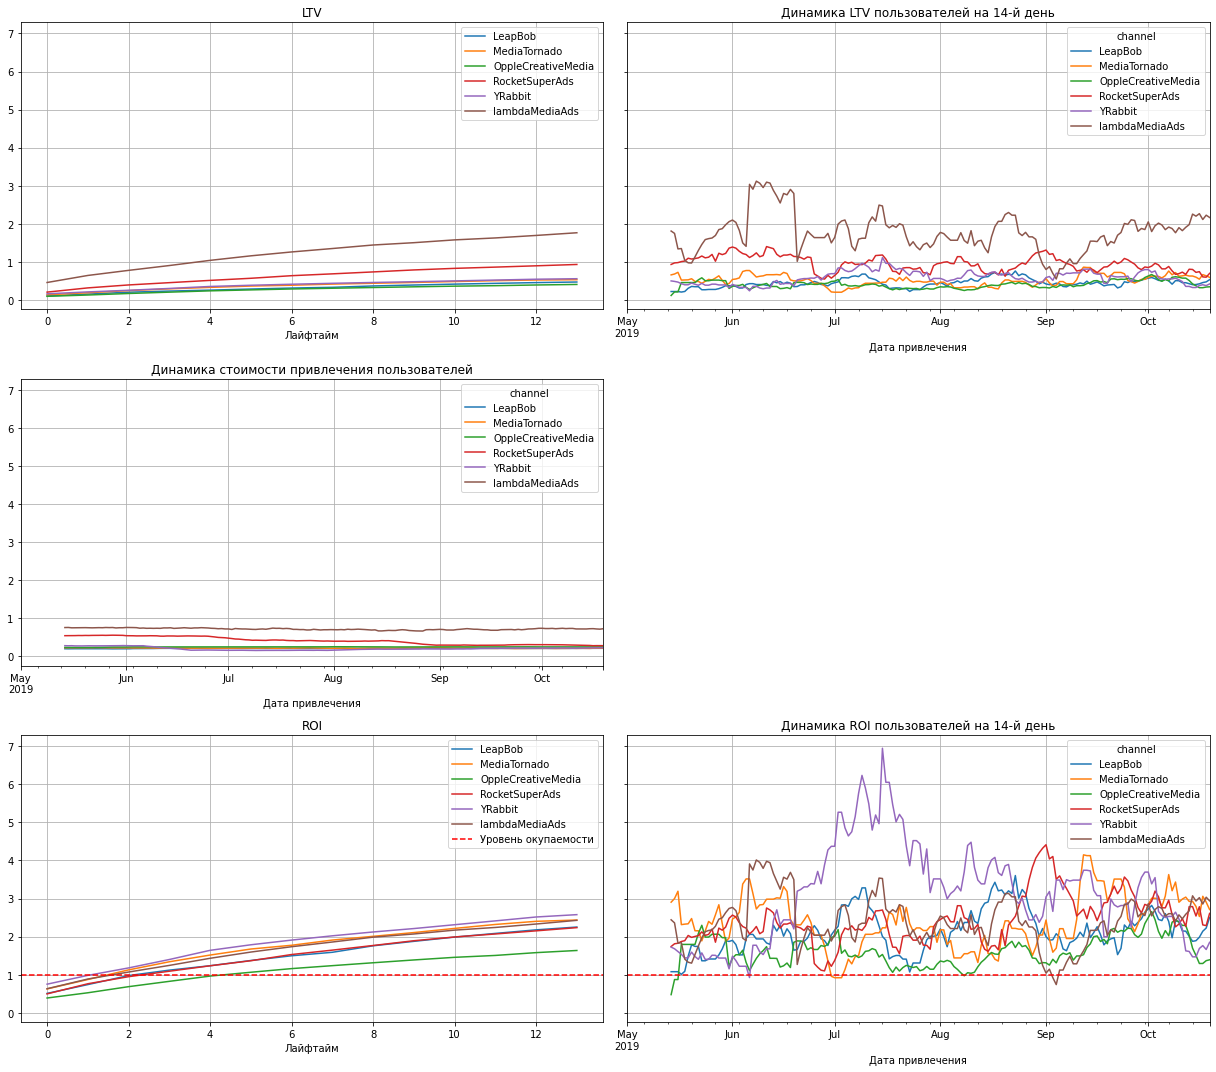

In [82]:
# получим данные о LTV и ROI в разрезе не существенных источников и построим графики по ним

(ltv_raw_other_channel, ltv_grouped_other_channel, ltv_history_other_channel, 
roi_grouped_other_channel, roi_history_other_channel) = get_ltv(profiles_ad_channel.query('new_channel == "Other"'), 
                                                orders, observation_date, horizon_days, dimensions=['channel'])

# строим графики
(plot_ltv_roi(ltv_grouped_other_channel, ltv_history_other_channel, roi_grouped_other_channel, 
              roi_history_other_channel, horizon_days))

1. Лучший показатель LTV, равный почти 2-м долларам, относится к каналу lambdaMediaAds, в 2 раза ниже результат у канала RocketSuperAds (почти 1 доллар). Остальные каналы находятся на отметке в 50-60 центов.
2. Для всех каналов САС остается практически неизменным в течение всего периода, за исключением канала RocketSuperAds, в отношении которого издержки снижаются каждые 2 месяца и стремятся к значению в 20-25 центов. Самый высокий уровень САС у канала lambdaMediaAds - около 80 центов.
3. Все источники окупаются. Самая высокая окупаемость у канала YRabbit - на 14-й день она составляет 260%, а самая низкая у канала OppleCrativeMedia - 170%.
4. Динамика окупаемости практически не опускается ниже 100%.

В целом среди не существенных источников все каналы быстро выходят на окупаемость (на 1-2 день лайфтайма) и далее она продолжает расти. Динамика окупаемости стабильна и практически не опускается ниже 100%.

Сравнивая результаты анализа показателей LTV, CAC и ROI для группы значимых (TipTop, FaceBoom, AdNonSense и WahooNetBanner) и не существенных каналов (все остальные), становится очевидно, что реклама на всех не существенных каналах окупается, а значит, работает гораздо лучше, чем на значимых, так как на последних окупаемость показывает только канал WahooNetBanner.

### Анализ конверсии в разрезе рекламных каналов

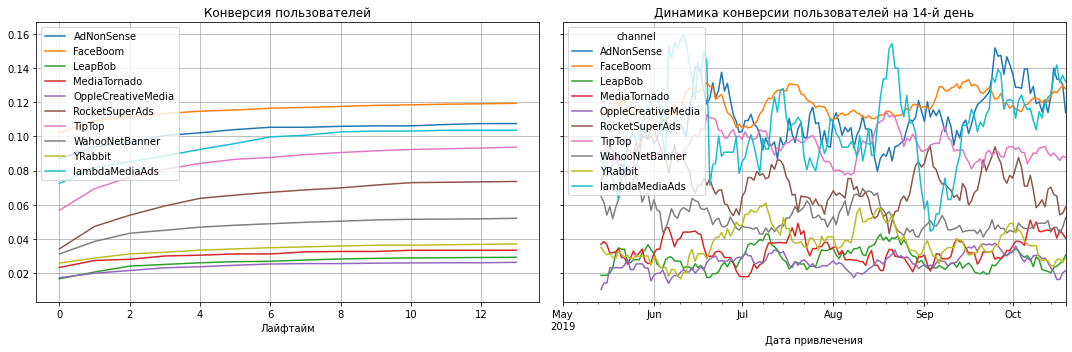

In [83]:
# посмотрим конверсию по всем рекламным каналам

(conversion_raw_channel, conversion_grouped_channel, 
 conversion_history_channel) = get_conversion(profiles_ad, orders, observation_date, horizon_days, 
                                              dimensions=['channel'])

plot_conversion(conversion_grouped_channel, conversion_history_channel, horizon_days)

Половина всех рекламных каналов имеею конверсию в 5% и менее, к тому же, для этих каналов практически не наблюдается роста конверсии в течение лайфтайма пользователей.

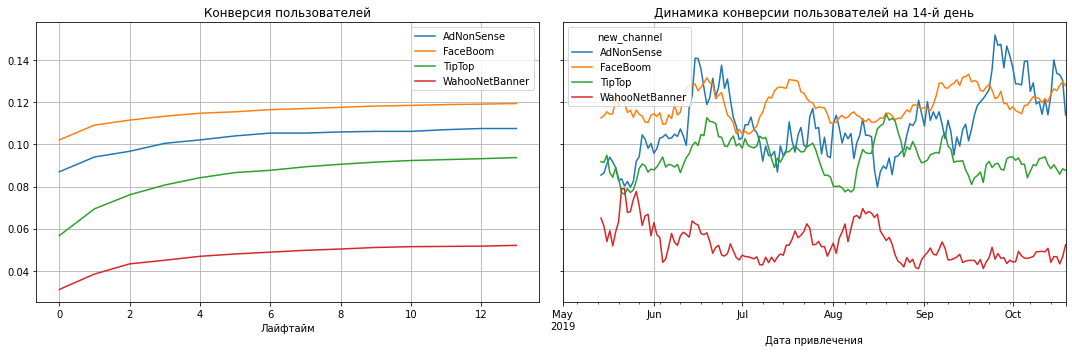

In [84]:
# посмотрим конверсию в разрезе значимых рекламных каналов (малозначимые и основные)

(conversion_raw_new_channel, conversion_grouped_new_channel,
conversion_history_new_channel) = get_conversion(profiles_ad_channel.query('new_channel != "Other"'), orders,
                                                 observation_date, horizon_days, dimensions=['new_channel'])

plot_conversion(conversion_grouped_new_channel, conversion_history_new_channel, horizon_days)

Из значимых каналов, все имеют достаточно высокий уровнь конверсии (более 8%), за исключением источника WahooNetBanner, для которго конверсия составляет 5%:
 - конверсия канала FaceBoom составляет 12%
 - конверсия канала AdNonSense составляет 11%
 - конверсия канала TipTop составляет 9%.
 
Конверсия всех значимых каналов имеет устойчивую динамику и отличается замедлением роста после 8-го дня привлечения пользователей.

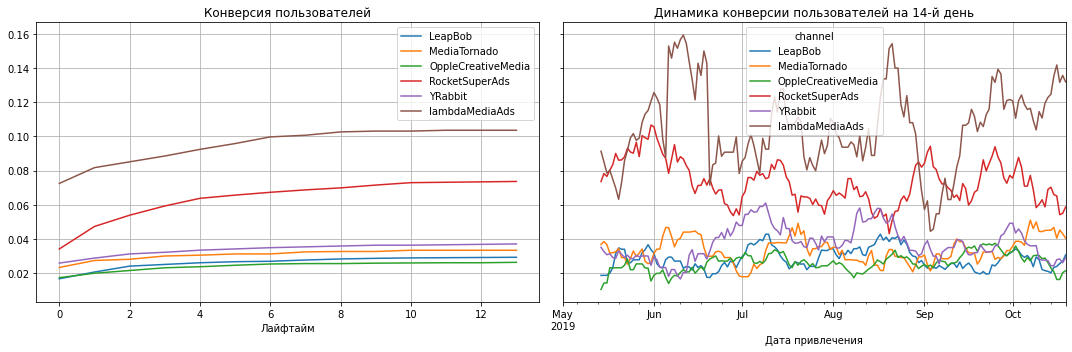

In [85]:
# посмотрим конверсию в разрезе не существенных рекламных каналов

(conversion_raw_other_channel, conversion_grouped_other_channel, 
conversion_history_other_channel) = get_conversion(profiles_ad_channel.query('new_channel == "Other"'), orders,
                                                   observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped_other_channel, conversion_history_other_channel, horizon_days)

Конверсия пользователей у канала RocketSuperAds она составляет 7,5%, а у канала LambadaMediaAds превышает 10%. 
Для источников YRabbit, MediaTornado, LeapBob и OppleCreativeMedia конверсия не растет и держится на уровне 4%, а значит потенциально эти рекламные площадки не перспективны.

### Анализ удержания в разрезе рекламных каналов

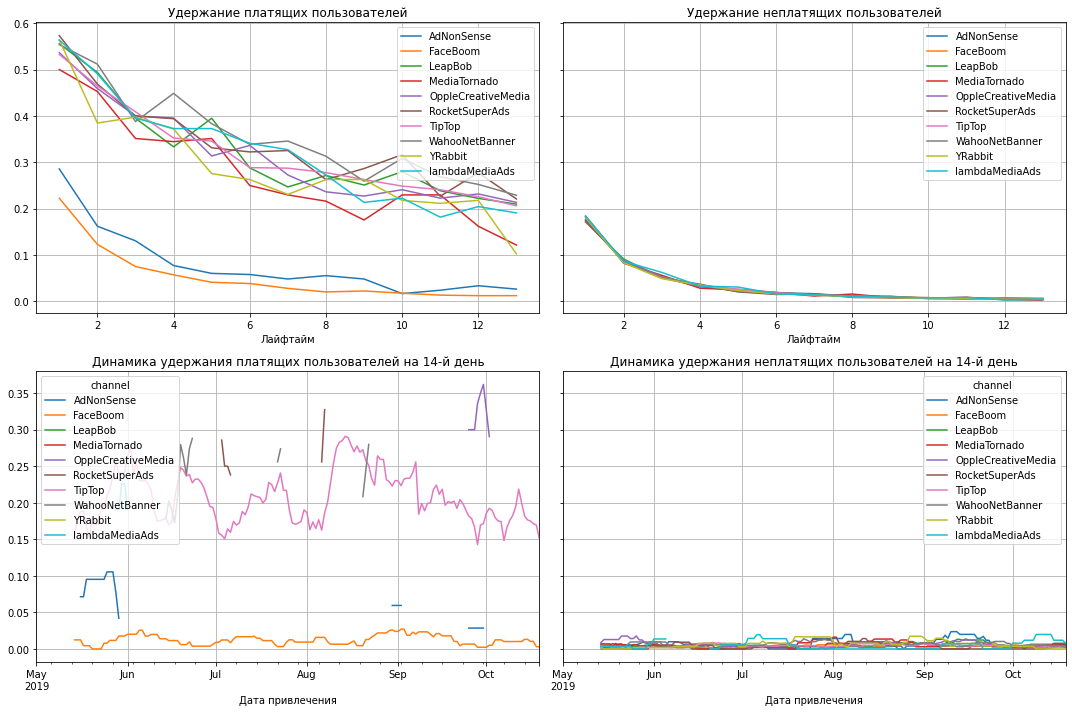

In [86]:
# посмотрим уровень удержания по всем рекламным источникам

(retention_raw_channel, retention_grouped_channel, 
 retention_history_channel) = get_retention(profiles_ad, visits, observation_date, horizon_days, 
                                            dimensions=['channel'])

plot_retention(retention_grouped_channel, retention_history_channel, horizon_days) 

Уровень удержания платящих пользователей для всех источников достаточно низкий и имеет быстрые темпы снижения, к 14-му дню падая в 3 раза. Худшие показатели удержания демонстрируют каналы FaceBoom и AdNonSense - от 30% в 1-й день до 2%-3% на 14-й день.

Динамика удержания платящих пользователей имеет прерывистый характер для большинства источников. Каналы привлечения, стабильно дающие качественных пользователей - это TipTop и FaceBoom.

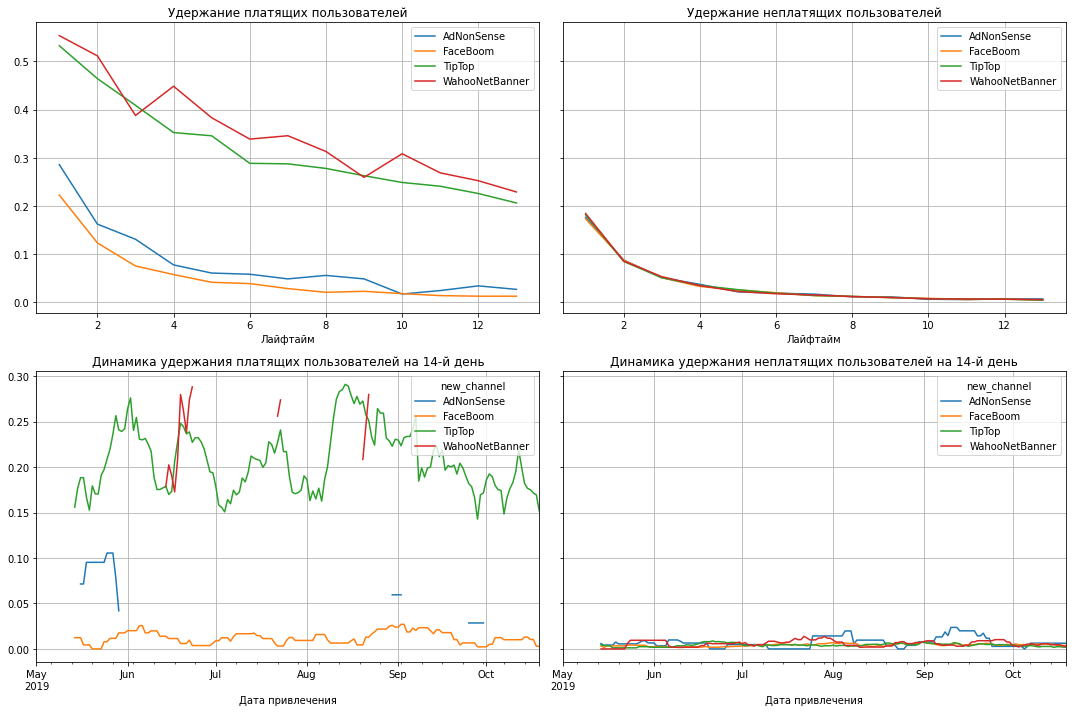

In [87]:
# посмотрим уровень удержания в разрезе значимых рекламных источников (малозначимые и основные)

(retention_raw_new_channel, retention_grouped_new_channel, 
retention_history_new_channel) = get_retention(profiles_ad.query('new_channel != "Other"'), visits,
                                               observation_date, horizon_days, dimensions=['new_channel'])

plot_retention(retention_grouped_new_channel, retention_history_new_channel, horizon_days) 

Уровень удержания у канала TipTop более низкий, чем у канала WahooNetBanner, но кривая динамики имеет меньше колебаний. На 14-й день удержания показатель равен 21% для канала TipTop и 24% для канала WahooNetBanner.

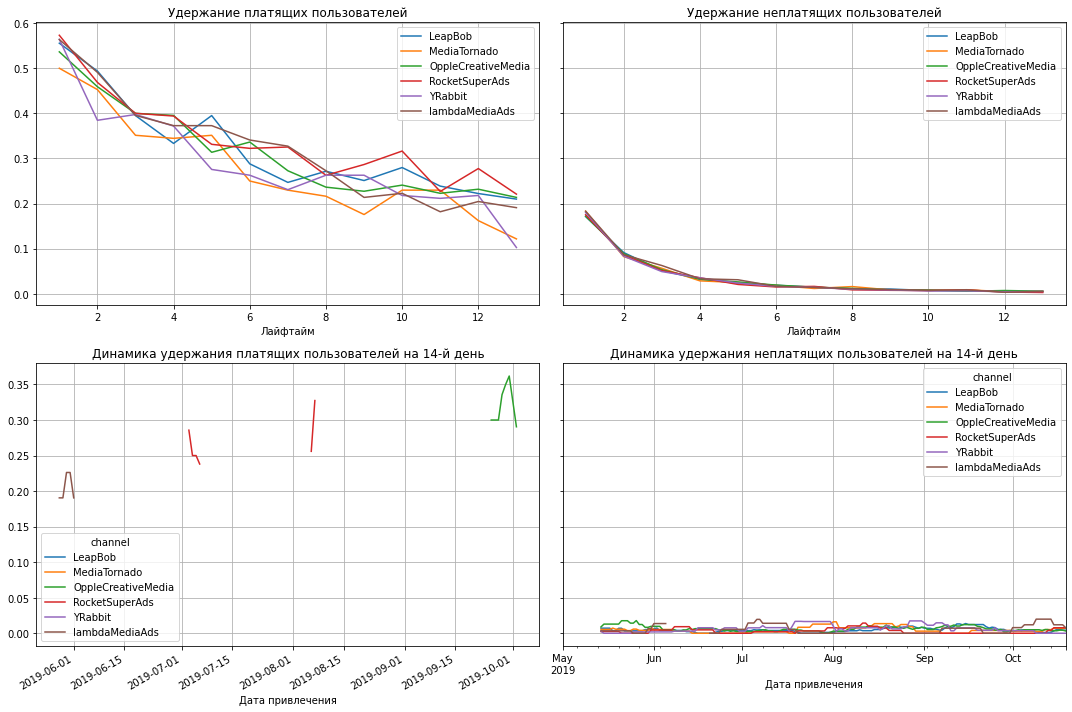

In [88]:
# посмотрим уровень удержания в разрезе не существенных рекламных источников

(retention_raw_other_channel, retention_grouped_other_channel, 
retention_history_other_channel) = get_retention(profiles_ad.query('new_channel == "Other"'), visits,
                                                 observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped_other_channel, retention_history_other_channel, horizon_days) 

Динамика удержания платящих пользователей среди всех не значимых каналов прерывистая, то есть часть клиентов периодически ничего не приобретала. Значит качество пользователей этих каналов ниже, чем у каналов другой группы.

### Вывод

Практически все не существенные каналы имеею конверсию в 5% и менее, лишь у канала RocketSuperAds она составляет 7,5%, а у канала LambadaMediaAds превышает 10%. У источников YRabbit, MediaTornado, LeapBob и OppleCreativeMedia конверсия не растет и держится на уровне 4%.

Показатель LTV для группы не существенных каналов в основном находятся на отметке в 50-60 центов, а САС в диапазоне 20-25 центов.
Из-за этого все каналы данной группы быстро выходят на окупаемость (на 1-2 день лайфтайма) и далее она продолжает расти, а динамика окупаемости стабильна и практически не опускается ниже 100%.

Динамика удержания платящих пользователей среди всех не существенных каналов прерывистая, то есть часть клиентов периодически ничего не приобретает. Значит, качество пользователей этих каналов ниже, чем у каналов другой группы.

Если в текущих условиях (с низким уровнем конверсии и качеством пользователей) эти рекламные площадки дают окупаемость в 2 и более раза, то, при условии сохранения тенденции неизменности САС или его незначительного увеличения, их необходимо рассматривать в качестве объектов потенциального роста для приложения за счет увеличения конверсии.


Из значимых каналов, все имеют достаточно высокий уровнь конверсии (более 8%), за исключением источника WahooNetBanner, для которго конверсия составляет всего 5%:
 - конверсия канала FaceBoom составляет 12%
 - конверсия канала AdNonSense составляет 11%
 - конверсия канала TipTop составляет 9%.
При этом конверсия всех этих источников отличается замедлением роста после 8-го дня привлечения покупателя.

Среди всех значимых каналов окупаемость рекламы достигается только для источника WahooNetBanner, начиная с 5-го дня привлечения. ROI для FaceBoom и AdNonSense располагается на графике практически параллельно уровню окупаемости и составляет 70%-80%, а окупаемость канала TipTop едва превышает 50%.

Динамика удержания платящих пользователей имеет прерывистый характер для большинства источников. Каналы привлечения, стабильно дающие качественных пользователей - это TipTop и FaceBoom.

Уровень удержания платящих пользователей для всех источников, независимо от их категории, достаточно низкий и имеет быстрые темпы снижения, к 14-му дню падая в 3 раза. Худшие показатели удержания демонстрируют каналы FaceBoom и AdNonSense - от 30% в 1-й день до 2%-3% на 14-й день. 

## Заключение

**Цель исследования** - разобраться в причинах убытков приложения ProcrastinatePRO+, возникших на фоне огромных вложений в рекламу, и помочь компании выйти в плюс.

**Задачи исследования:**
- узнать откуда приходят пользователи и какими устройствами они пользуются,
- узнать сколько стоит привлечение пользователей из различных рекламных каналов;
- узнать сколько денег приносит каждый клиент,
- узнать когда расходы на привлечение клиента окупаются,
- узнать какие факторы мешают привлечению клиентов.

Исследование состоит из 9-ти разделов:

**В 1-м разделе выполнялось изучение данных и их предобработка.**

Здесь было произведено знакомство с данными методами `info()`, `duplicated().sum()`. При обработке данных потребовалось изменить написание наименований столбцов методами `str.lower()` и `str.replace()` и выборочно изменить тип дат с помощью метода `to_datetime()`.

**Во 2-м разделе выполнялась подготовка технической составляющей исследования.**

Необходимо было создать или адаптировать готовые функции для расчета и визуализации таких метрик как конверсия, удержание, LTV, CAC, ROI, а также функцию сглаживания. В исследовании использовались адаптированные функции, изученные в теоретической части курса.

**В 3-м разделе проводился анализ пользователей.**

По созданному датафрейму с профилями пользователей (использовалась функция, изученная в теоретической части курса), анализировалось региональное распределение платящих пользователей и используемые ими устройства, а также были рассмотрены источники привлечения пользователей. Полученные данные показали, что:

Приложением пользуются клиенты из 4-х стран: США, Германии, Великобритании и Франции. Объем фактической клиентской базы (всех текущих пользователей) в США в 5,7 раз больше чем во Франции и Великобритании и в 6,7 раз больше, чем в Германии, при этом доля покупателей среди всех клиентов в США мнее чем в 2 раза превышает этот же показатель в остальных рассматриваемых странах.

Клиенты используют 4 типа устройств: Mac, iPhone, Android и PC, при этом доля платящих пользователей независимо от типа устройства превышает 5%. Тем не менее, покупатели чаще используют Mac (6,36%) и iPhone (6,21% ), а в отношении остальных устройствах доля платящих пользователей составляет менее 6%.

Несмотря на такое процентное соотношение устройств среди покупателей, из общего числа всех клиентов наибольшую популярность имеет iPhone - его используют 54479 человек, что в 1,8 раза превышает количество пользователей Mac и PC (по 30 тысяч человек) и в 1,6 раза превышает количество пользователей Android (35 тысяч человек).

Для привлечения пользователей приложение использует 10 рекламных каналов. Среди них 4 канала привели менее 5% покупателей, а топ-5 наиболее продуктивных площадок с наибольшей долей покупателей составили:
1. FaceBoom - 12,2% или 3557 человек из 29144 человек,
2. AdNonSense - 11,34% или 440 человек из 3880 человек,
3. lambdaMediaAds - 10,47% или 225 человек из 2149 человек,
4. Tiptop - 9,6% или 1878 человек из 19561 человека,
5. RocketSuperAds - 7,91% или 352 человека из 4448 человек.

С точки зрения общего трафика потенциальных клиентов наиболее успешными площадками являются:
1. FaceBoom - 29144 человека,
2. Tiptop - 19561 человек,
3. OppleCreativeMedia - 8605 человек,
4. LeapBob и WahooNetBanner - по 8553 человек

Доля покупателей с канала organic (естественный рост) составила 2,06% с объема трафика в 56439 человек.

**В 4-м разделе проводился анализ маркетинговых расходов**

В этой части исследования были детально изучены маркетинговые расходы приложения: уровень затрат по каналам привлечения и по месяцам, динамика изменения уровня затрат по источникам во времени, а также показатель стоимости привлечения одного клиента (САС).

Общая сумма маркетинговых расходов с мая по октябрь 2019 составила более 105 тысяч долларов.
На протяжении всего рассматриваемого приода мы наблюдаем ежемесячный рост рекламных расходов, за исключением последнего месяца: в октябре сумма затрат сократилась на 1,5 тысячи долларов, практически вернувшись на уровень августа.
Ежемесячный рост затрат можно рассматривать как волнообразный:  первый скачок был в июне, когда произошло значительное увеличение бюджета на 5 тысяч долларов, а второй в августе, когда расходы выросли ещё на 4,2 тысячи долларов.

Распределение маркетингового бюджета по каналам привлечения крайне поляризовано и по общей сумме затрат на каждую рекламную площадку все источники можно разделить на 3 группы:
 - не существенные каналы привлечения с тратами до 2,5 тысяч долларов (6 площадок)
 - малозначимые каналы привлечения с тратами до 5,5 тысяч долларов (площадки `WahooNetBanner` и `AdNonSense`)
 - основные каналы привлечени с затратами более 30 тысяч долларов (площадки `TipTop` и `FaceBoom`)

Здесь важно отметить кардинальный разрыв в суммах затрат даже между двумя основными используемыми площадками: на `TipTop` потратили 54,8 тыс.долларов, а на `FaceBoom` 32,4 тыс. долларов, разница составляет более  20 тысяч долларов.

При анализе распределения маркетинговых расходов по месяцам **_среди не существенных каналов_** привлечения стоит отметить, что структура рекламных источников в мае значительно отличается от всех остальных периодов. В мае наибольшее значение имели `RocketSuperAds` и `lambdaMediaAds`, однако с июня по октябрь расходы на эти плащадки сокращаются примерно в 2 раза и, в основном, не превышают 250 долларов.
С июня наиболее значимыми в рассматриваемой группе становятся площадки `OppleCreativeMedia` и `LeapBob` с расходами от 300 до 450 долларов.

В группу **_малозначимых каналов_** входят площадки `AdNonSense` и `WahooNetBanner`. Как и в группе не существенных каналов, в июне здесь поихошла кардинальная смена приоритетов с источника AdNonSense на WahooNetBanner.  Расходы на приоритетный канал врьируются в диапазоне 800-1200 долларов, тогда как на второй канал расходуется от 400 до 600 долларов.

Среди **_основных рекламных каналов (`TopTop` и `FaceBoom`)_** в мае и июне разница в объемах финансирования была незначительной, хотя в июне также произошла смена приоритетного канала привления на TipTop. Но, начиная с июля, расходы на канал TipTop выросли более чем в 1,5 раза и продолжили увеличиваться каждый следующий месяц, тогда как расходы на канал FaceBoom увеличились всего на 240-770 долларов.

Таким образом, с июня по октябрь 2019 расходы на канал FaceBoom практически не изменились и, в среднем, составили 580 долларов в месяц, тогда как расходы на канал TipTop увеличивались не равномерно. Пик прироста канала TipTop приходится на август, когда затраты увеличились на 2790 долларов.

Анализируя структуру каналов привлечения за каждый месяц, необходимо отметить, что с июня началось её планомерное изменение: ежемесячно увеличиавалась доля канала TipTop, в первую очередь, за счет сокращения доли не существенных рекламных площадок. 

Так доля канала TipTop выросла практически в 2 раза: с 29,9% в мае 2019 до 58,6% в октябре, а доля не существенных каналов сократилась с 18,9% до 6,8% или в 2,8 раза.
Кроме того, несмотря на некотрый рост остальных рекламных площадок в отдельные месяцы, в целом мы наблюдаем такое же планомерное сокращение долей этих каналов. Если рассматривать изменения в структуре с точки зрения доли канала FaceBoom и совокупной доли каналов AdNonSense и WahooNetBanner, то, в среднем, сокращение их объемов происходило на 2% ежемесячно.

Обобщая полученные сведения о САС, можно сделать следующие выводы:
1. Все источники привлечения также можно разделить на три группы:
 - дешевые источники, где САС менее 50 центов 
 - источники среднего сегмента, где САС менее 1 доллара
 - дорогие источники, где САС более 1 доллара

2. Самый дешевый канал привлечения обходится приложению в 21 цент за пользователя, а самый дорогой - в 2,80 долларов.
3. Самый дорогой канал привлечения - это `TipTop`, его САС (2,80 долларов) в 2,5 раза выше даже по сравнению со вторым по значимости источником FaceBoom, для которого САС равен 1,11 долларов. 
4. Для `TipTop` наблюдается ежемесячный рост показателя САС, тогда как для `FaceBoom` он остается неизменным на протяжении всех рассматриваемых периодов, кроме июня, когда САС увеличился до 1,12 долларов (всего на 1 цент). Таким образом, динамика ежемесячного увеличения САС для канала TipTop коррелирует с изменениями в структуре распределения маркетинговых расходов по источникам.

**В 5-м разделе проводился общий анализ окупаемости рекламы**

Несмотря на имеющиеся колебания в динамике конверсии, в целом показатель достаточно высокий, демонстрирует уверенный ежедневный рост и к 12-му дню достигает 8%. При таком уровне конверсии отсутствие окупаемости рекламы с большой вероятностью будет связано с низким удержанием клиентов.

Общий уровень удержания платящих пользователей в среднем составляет 10% на протяжении всего рассматриваемого периода. Как и предполагалось, уровень удержания критически низкий, можно говорить о том, что удержание клиентов отсутствует.

Кроме того, CAC имеет устойчивую тенденцию к ежемесячному росту и его темпы роста опереждает темпы роста LTV в 1,5 раза, что приводит к снижению ROI. Кривая динамика ROI демонстриуем падаение с первого месяца и к октябрю снижается до 60%.

В итоге реклама не окупается, так как к 14-му дню ROI едва превышает 80%.

**В 6-м разделе проводился анализ окупаемости рекламы с разбивкой по устройствам**

Пользователи всех устройств имеют стабильную конверсию выше 6% с одинаковой для всех тенденцией постепенного роста показателя день за днем. Устройства iPhone и Mac имею самую высокую конверсию, уровень которой к 14-му дню превышает 8%.
Качество пользоватлей на Mac, iPhone и Android значительно (в 1,5-2 раза) выше, чем на PC. Несмотря на это, реклама окупается только в отношении пользователей, использующих PC, при этом она наступает только на 10-й день.

Пользователи всех устройств стабильно плохо удерживаются - уровень удержания платящих пользователей составляет менее 40% на 1-й день и к 14-му дню снижается в 4 раза, опускаясь до отметки в 10% и менее. При этом уровень удержания платящих пользователей на PC самый высокий, тогда как покупатели, использующие наиболее конвертируемые устройства, имеют самы низкие показатели удержания. Вероятно, у клиентов на Android, Mac и iPhone возникают какие-то технические ошибки при использовании приложения, из-за чего их удержание ниже, а реклама и вовсе не окупается. 

Тем не менее, при стабильном росте LTV и конверсии клиентов в покупателей, а также самом низком уровне CАС, удержание платящих клиентов на PC находится на слишком низком уровне (около 13% на 14-й день), а динамика ROI имеет тенденцию к снижению. Возможно, что приложение недостаточно адаптировано под использование его на PC, из-за чего при достижении какого-то уровня (рейтинга/отметки/выполнения задания), дальнейшее использование приложени на PC для покупателя становится неудобным или невозможным, поэтому они отказываются от него.

**В 7-ом разделе проводился анализ окупаемости рекламы с разбивкой по странам**

Обобщая анализ окупаемости рекламы по странам, можно обозначить проблемный регион - США.

 Пользователи из США имеют:
 - почти 10%-ю конверсию в покупателей, тогда как в европейском регионе она в 2 раза ниже,
 - более качественных пользователей, по сравнению с Германией и Францией (сплошная кривая динамики удержания платящих пользователей),
 - самый высокий уровень LTV среди всех регионов: он достигает 1 доллара на 14-й день,
 - худший показатель удержания: в районе 10% на 14-й день, что в 1,5-2 раза ниже, чем в европейском регионе.
 
**В 8-ом разделе проводился анализ окупаемости рекламы с разбивкой по рекламным каналам** 
 
Практически все **_не существенные каналы_** имеею конверсию в 5% и менее, лишь у канала RocketSuperAds она составляет 7,5%, а у канала LambadaMediaAds превышает 10%. У источников YRabbit, MediaTornado, LeapBob и OppleCreativeMedia конверсия не растет и держится на уровне 4%.

Показатель LTV для группы не существенных каналов в основном находятся на отметке в 50-60 центов, а САС в диапазоне 20-25 центов.
Из-за этого все каналы данной группы быстро выходят на окупаемость (на 1-2 день лайфтайма) и далее она продолжает расти, а динамика окупаемости стабильна и практически не опускается ниже 100%.

Динамика удержания платящих пользователей среди всех не существенных каналов прерывистая, то есть часть клиентов периодически ничего не приобретает. Значит, качество пользователей этих каналов ниже, чем у каналов другой группы.

Если в текущих условиях (с низким уровнем конверсии и качеством пользователей) эти рекламные площадки дают окупаемость в 2 и более раза, то, при условии сохранения тенденции неизменности САС или его незначительного увеличения, их необходимо рассматривать в качестве объектов потенциального роста для приложения за счет увеличения конверсии.

**_Из значимых каналов_**, все имеют достаточно высокий уровнь конверсии (более 8%), за исключением источника WahooNetBanner, для которго конверсия составляет всего 5%:
 - конверсия канала FaceBoom составляет 12%
 - конверсия канала AdNonSense составляет 11%
 - конверсия канала TipTop составляет 9%.
При этом конверсия всех этих источников отличается замедлением роста после 8-го дня привлечения покупателя.

Среди всех значимых каналов окупаемость рекламы достигается только для источника WahooNetBanner, начиная с 5-го дня привлечения. ROI для FaceBoom и AdNonSense располагается на графике практически параллельно уровню окупаемости и составляет 70%-80%, а окупаемость канала TipTop едва превышает 50%.

Динамика удержания платящих пользователей имеет прерывистый характер для большинства источников. Каналы привлечения, стабильно дающие качественных пользователей - это `TipTop` и `FaceBoom`.

Уровень удержания платящих пользователей для всех источников, независимо от их категории, достаточно низкий и имеет быстрые темпы снижения, к 14-му дню падая в 3 раза. Худшие показатели удержания демонстрируют каналы FaceBoom и AdNonSense - от 30% в 1-й день до 2%-3% на 14-й день. 

**В 9-ом разделе резюмируются результаты исследования и формулируется общий вывод**

Причины убытков в последние несколько месяцев:

**1. Изменение структуры каналов привлечения.**

И если для групп не существенных и малозначимых каналов решение о переориентация между площадками можно обосновать экономическими выгодами, то в отношении основной группы каналов это не представляется возможным. 

Вероятнее всего, сравнивались показатели САС в каждой группе каналов и, исходя из этого, приняли решения:

- в группах не существенных и малозначимых каналов привлечения сократить долю более дорогих источников (RocketSuperAds по 41 центу, lambdaMediaAds по 72 цента и AdNonSense по 1,01 даллара) в пользу более дешевых (OppleCreativeMedia по 25 центов, LeapBob по 21 центу и WahooNetBanner по 60 центов).
 - в основной группе каналов, наоборот, увеличить долю более дорого источника TipTop по 2,80 доллара взамен FaceBoom по 1,11 доллара.

Оба основных канала привлечения действуют только в США, при этом источник FaceBoom имеет большую аудиторию, чем площадка TipTop: 29144 человека против 19561 человека. К тому же доля платящих пользователей у канала FaceBoom составляет 12,2%, что на 2,6% выше, чем у источника TipTop с 9,6%.
Кроме того, для канала TipTop наблюдается ежемесячный рост среднего показателя САС, тогда как для FaceBoom он остается практически неизменным на протяжении всех рассматриваемых периодов. 

По всем параметрам источник FaceBoom является более выгодным и перспективным, чем TipTop, однако, именно в последний было вложено больше всего средств. Затруднительно понять, по каким именно причинам это было сделано, но исходят из динамики роста САС и меньшей доли платящих клиентов, такое решение было ошибочным и сыграло ключевую роль в полученных убытках.

**2. Низкий уровень удержания клиентов.**

Независимо от региона, устройства пользователя или источника его привлечения приложение стабильно показывает низкий уровень удержания в первый дни (от 35% до 55%) и стремительное снижение этого показателя к 14-му дню в 2-3 раза. В среднем кривая динами удердания находится на отметке в 10% на каждй 14-й день.

Возможные причины низкого уровня удержания клиентов:
- потеря интереса к продукту из-за неудобного интерфейса или возникающих ошибок на определенном этапе,
- приложение ориентировано не на постоянных клиентов, а на их частую смену (изначально заложен короткий жизненный цикл продукта). Например, развлекательное приложение заточено под выполнение каких-то действий пользователей за определенный срок и этот срок меньше 14 дней. В таком случае клиенты могут прекращать пользоваться приложением из-за того, что они уже выполнили все необходимые действия. К тому же, польщователь в принципе может выполнять действия быстрее, чем залодено.
- смещение фокуса на привлечение новых клиентов в расчете на то, что постоянное расширение клиентской базы приведет к росту прибыли. 

**3. Отсутствие окупаемости рекламы в США при колоссальных рекламных затратат в этом регионе.**

Потенциально США - самый прибыльный регион, так как здесь:
- самая обширная база возможных клиентов,
- самая высокая конверсия, равна почти 10%,
- самая высокая доля платящих пользователей, равна 6,9%,
- самый высокий уровень LTV среди всех регионов, равный 1-му доллару.

Тем не менее, несмотря на все эти показатели, США - это единственный регион, в котором реклама не окупается.

Единственная причина в этой ситуации - слишком активное использование дорогостоящих источников привлечения. В США действуют такие каналы как: TipTop, FaceBoom, MediaTorado, YaRabbit и RocketSuperAds. Все из них, кроме TipTop и FaceBoom, на которые совокупно было потрачено 82,6% всех рекламных расходов из 105 тыс. долларов, имеют средний САС от 20 до 40 центов и окупаются на 1-2 день лайфтайма пользователей, а далее показатель ROI только продолжает расти. Динамика окупаемости этих источников стабильна и практически не опускается ниже 100%.

Средний САС канала TipTop слишком высокий (2,80 долларов), а у канала FaceBoom замедляется конверсия пользователей после 8-го дня.

**4. Пользователи, использующие Mac, iPhone и Android не окупаются**

Вероятно, у клиентов на Android, Mac и iPhone возникают какие-то технические ошибки при использовании приложения, из-за чего их удержание ниже, а реклама и вовсе не окупается. 
Так как исходные файлы не содержат информации о дополнительных событиях, то проверить это предположение не представляется возможным.

**Рекомендации:**
1. Изменить пропорции распределения рекламных расходов в США между каналами в пользу источников MediaTorado, YaRabbit и RocketSuperAds.
2. Часть рекламных расходов, ранее отдаваемых для канала TipTop, использовать для каналов европейского региона, в первую очередь для lambdaMediaAds и AdNonSense.
3. Изменить подход к удержанию пользователей.
4. Проверить работу прилодения на Android, Mac и iPhone на предмет технических ошибок.
5. Проверить адаптивность приложения под PC.
6. Рассмотреть возможность увеличения конверсии для источников YRabbit, MediaTornado, LeapBob и OppleCreativeMedia.